# 強化学習の報酬に関する一研究（ダブルアップを題材に）

私が初めて**ダブルアップ**を覚えたのは、ファミコン版のドラゴンクエスト4でした。ドラクエ4では、[オーバーフローにより大量のコインをタダ同然の値段で入手](http://dic.nicovideo.jp/a/838861)できたので、カジノに入り浸ることはありませんでしたが、その後のシリーズではお世話になったものです。

本稿では、このダブルアップを題材に、強化学習の**報酬**について研究してみたいと思います。具体的には、報酬を2通りのパターンで与え、モデルが対極的な戦略を学習することを示します。

## 免責事項

- 本研究の内容は、著者個人が、知的好奇心・探究心にもとづいて行ったものです。
- 本研究の内容は、機械学習に関する情報の提供を目的としたものであり、ギャンブルの勧誘を目的としたものではありません。
- 本研究の内容を参考にして、ギャンブルの判断を行わないでください。また、本研究の内容が正確であることを、著者は一切保証しません。
- ギャンブルを行う際には、ギャンブルを行う本人のみの判断と責任において行ってください。
- 仮にギャンブルに失敗し、ギャンブルを行った者の資産が減ったり債務を負ったりしても、著者はなんら責任を負いません。
- その他、本研究を参考にしたかどうかに関わらず、ギャンブルの失敗や機会の損失等を含むいかなる不利益が何人に生じたとしても、著者はなんら責任を負いません。


## ダブルアップとは

ルールにバリエーションがありますが、共通ルールはこう説明できるかと思います。

**＜共通ルール＞**

*最初にコインをm枚保有しており、コイン全てを賭けてn回のラウンドを戦う。各ラウンドの勝敗は、カードの数値が、基準pより高いか低いかによって定まる。負ければ賭けたコインは全て没収され終了。勝てばコインは2倍となり、次ラウンドに挑戦するかどうかをプレーヤーが選択できる。*

本研究では、以下のルールを採用します。

**＜本研究におけるルール＞**

*ハイ＆ローの2カード方式を採用する。すなわち、左に1枚のカードが開かれ、右に1枚のカードが伏せられている。プレーヤーは、伏せられているカードの数値が、開かれているカードの数値より高い（ハイ）か低い（ロー）かを予想する。予想が的中すればプレーヤーの勝ち、的中しなければ負けとする。なお、カードの数値が等しい場合は、プレーヤーの勝ちとする。
また、カードの数値は、以下の右ほど高いものとする。*

$$2<3<4<5<6<7<8<9<10<J<Q<K<A<Joker$$

*コイン枚数mの初期値は1。ラウンド数nは10とする。*

*なお、kラウンドで伏せられていたカードが、k+1ラウンドで開かれているカードとなるものとする。このルールを、**キャリーオーバールール**と名付ける。kラウンドで開かれていたカードは一度デッキに回収される。デッキのシャッフル後、無作為に1枚抽出され、k+1ラウンドで伏せられているカードとなるものとする。*


## 研究手法

**＜手法＞**

ダブルアップをゲームとして実装し、DQNにプレー（訓練）させ、DQNの学習した戦略を検証します。

DQN（deep Q-network）とは、機械学習の一種である強化学習（Q学習）において、Q値——ある行動から得られる報酬の見込みに比例した数値であり、行動指針となるもの——をニューラルネットワークで近似する手法となります。

強化学習については、以下の記事が詳しく、わかりやすく、勉強になります。

- [強化学習入門 ～これから強化学習を学びたい人のための基礎知識～ ](http://blog.brainpad.co.jp/entry/2017/02/24/121500)
- [ゼロからDeepまで学ぶ強化学習](https://qiita.com/icoxfog417/items/242439ecd1a477ece312)

本研究では、報酬について、１）ゲーム終了時に保有しているコインの枚数とした場合と、２）ゲーム終了時に保有しているコインの枚数の**対数**（ただし、0は0）とした場合の2パターンで訓練を行い、DQNの学習した戦略を比較します。

**＜実装＞**

DQNの実装が「Keras-RL」というパッケージで提供されています。また、Keras-RLでプレーできるゲームの抽象クラスが「OpenAI Gym」として提供されています。これらをインストールして利用します。

ゲームについては、抽象クラス[gym.Env](https://github.com/openai/gym/blob/master/gym/core.py)を継承のうえ、必須項目を実装していきます。いくつか実装ポイントがあるのですが、報酬について、手法で挙げた2パターンで実験できるように実装します。

DQNについては、パラメータの設定が主となります。工夫というほどではないですが、分割統治の観点から、以下2つのモデルを組み合わせることにしました。

1. 数値が高いか低いかを予想するモデル
1. 次ラウンドに挑戦するかどうかを判断するモデル


## 実験1

報酬を「ゲーム終了時に保有しているコインの枚数」とした場合の実験です。

### モデル1の訓練、検証

**＜訓練＞**

以下モデル1の訓練を行います。

1. 数値が高いか低いかを予想するモデル
1. 次ラウンドに挑戦するかどうかを判断するモデル

付録のソースコードを実行後に、以下のコードを実行しました。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 20000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 1s 966us/step - reward: 1.0280
1000 episodes - episode_reward: 1.028 [0.000, 2.000]

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 7s 7ms/step - reward: 1.2560
1000 episodes - episode_reward: 1.256 [0.000, 2.000] - loss: 0.367 - mean_q: 1.449

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 7s 7ms/step - reward: 1.3120
1000 episodes - episode_reward: 1.312 [0.000, 2.000] - loss: 0.325 - mean_q: 1.545

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 7s 7ms/step - reward: 1.3180
1000 episodes - episode_reward: 1.318 [0.000, 2.000] - loss: 0.325 - mean_q: 1.540

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 6s 6ms/step - reward: 1.3140
1000 episodes - episode_reward: 1.314 [0.000, 2.000] - loss: 0.325 - mean_q: 1.542

In

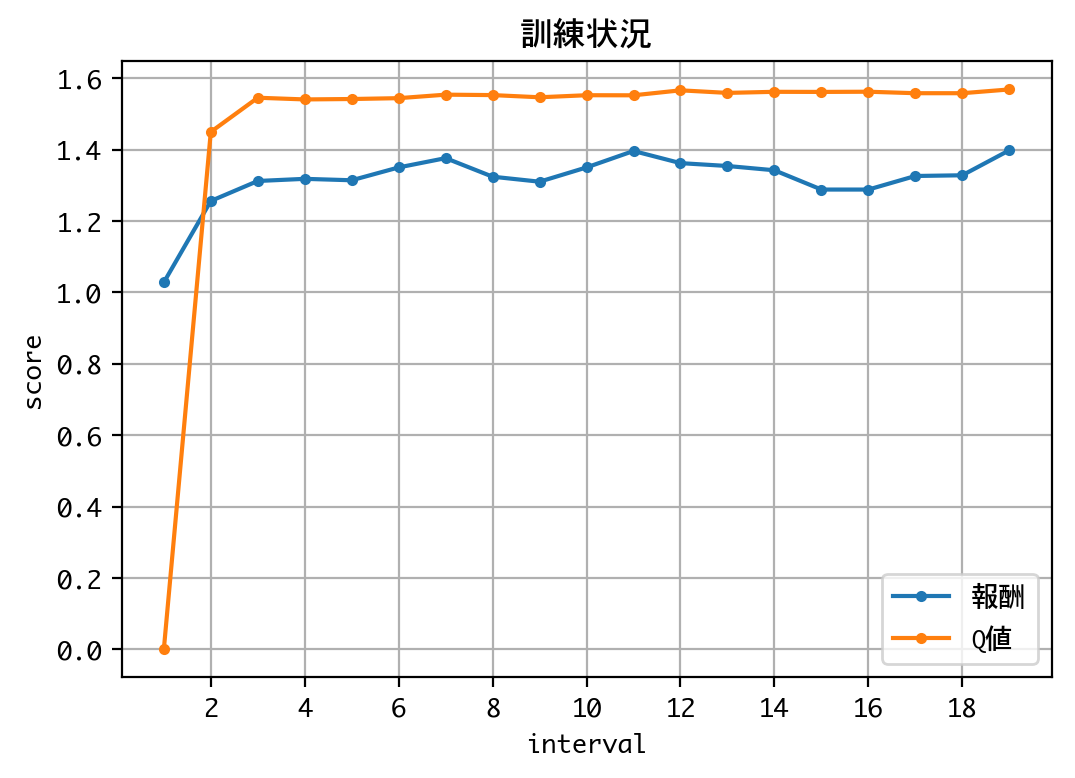

合計獲得枚数(20000回)：26344枚
平均獲得枚数(20000回)：1.3172枚
0枚：6828回（34.14%）
2枚：13172回（65.86%）


In [2]:
TAKES_A_LOGARITHM_OF_REWARD = False
m = DQNDoubleUpOne(recycle=False)
h = m.train(nb_steps=20000, log_interval=1000, verbose=1)
visualize_coin(m.env)

Q値の推移を見る限り、学習は収束していると考えられるので、訓練を終了し、検証に移ります。

**＜検証＞**

まず、訓練済みモデルを用いて、数値が高いか低いかの予想を10000回試行します。

In [12]:
TAKES_A_LOGARITHM_OF_REWARD = False
m = DQNDoubleUpOne(recycle=True)
h = m.test(nb_episodes=10000, visualize=False, verbose=0)
visualize_coin(m.env)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
合計獲得枚数(10000回)：15720枚
平均獲得枚数(10000回)：1.572枚
0枚：2140回（21.4%）
2枚：7860回（78.6%）


予想的中率は78.6%でした。みなさん、どういう印象を持たれたでしょうか。私は、結構高いという印象を持ちました。

次に、Q値を見てみます。Q値を見ることで、このモデルが学習した戦略を見ることができます。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
1.0522794
1.0164278


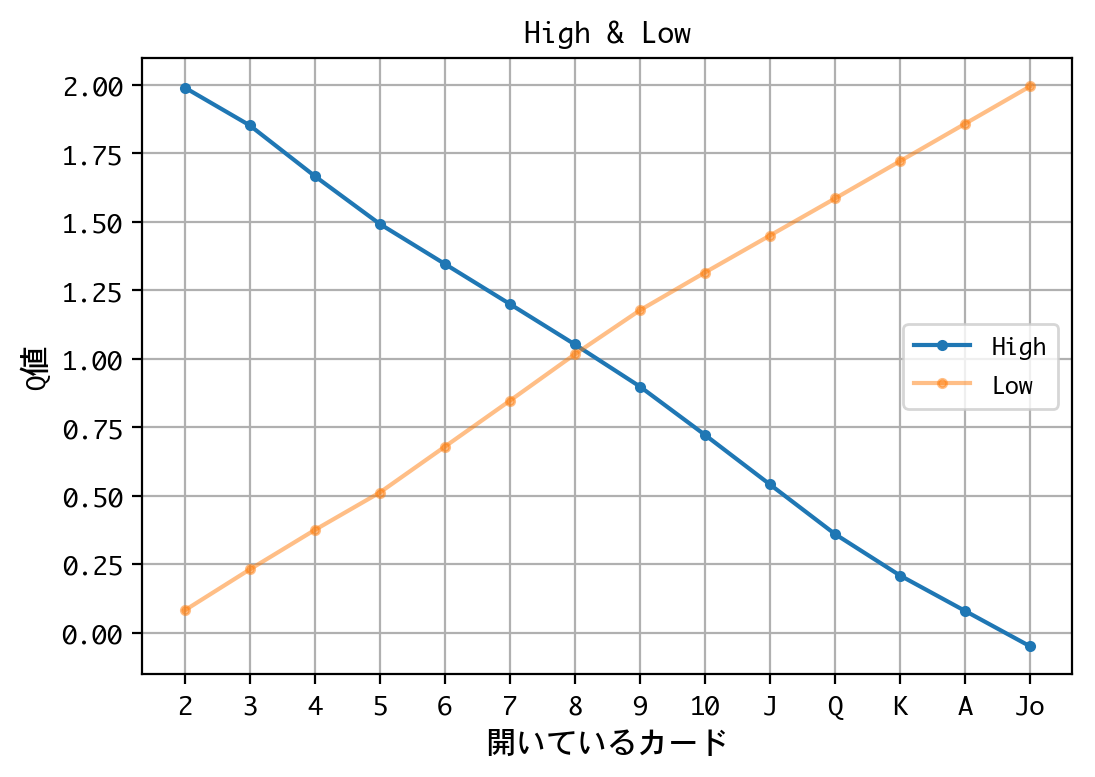

In [3]:
TAKES_A_LOGARITHM_OF_REWARD = False
m = DQNDoubleUpOne(recycle=True)
print(m.dqn.compute_q_values([[Cards.EIGHT]])[Bet.HIGH])
print(m.dqn.compute_q_values([[Cards.EIGHT]])[Bet.LOW])
visualize_q_bet(m)

X状のグラフになりました。このグラフは、開いているカードが8以下なら高い（High）と予想、9以上なら低い（Low）と予想する戦略を示しています。

以下に、予想的中率の理論値を示します。（場合の数を数え上げただけです。）

|開いているカード|2|3|4|5|6|7|8|9|10|J|Q|K|A|Joker|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|予想＝High|$\frac{53}{53}$|$\frac{49}{53}$|$\frac{45}{53}$|$\frac{41}{53}$|$\frac{37}{53}$|$\frac{33}{53}$|$\frac{29}{53}$|$\frac{25}{53}$|$\frac{21}{53}$|$\frac{17}{53}$|$\frac{13}{53}$|$\frac{9}{53}$|$\frac{5}{53}$|$\frac{1}{53}$|
|予想＝Low|$\frac{3}{53}$|$\frac{7}{53}$|$\frac{11}{53}$|$\frac{15}{53}$|$\frac{19}{53}$|$\frac{23}{53}$|$\frac{27}{53}$|$\frac{31}{53}$|$\frac{35}{53}$|$\frac{39}{53}$|$\frac{43}{53}$|$\frac{47}{53}$|$\frac{51}{53}$|$\frac{53}{53}$|

モデルが学習した戦略は、理論的に見ても、妥当な戦略と言えることがわかります。この戦略を**戦略X**と名付けます。

**＜補足＞**

以下、後から参照するための補足事項二点です。

第一に、 `max(High, Low)`と、各カードの出現頻度（そのカードが開かれている確率）の積和をとることで、当該ラウンドにおける予想的中率を求めることができます。ラウンド1における各カードの出現頻度は、以下のとおりです。

|カード|2|3|4|5|6|7|8|9|10|J|Q|K|A|Joker|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|出現頻度|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{4}{54}$|$\frac{2}{54}$|
|出現頻度(%)|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$7.41$|$3.70$|

予想的中率を計算すると、373/477（約78.2%）となり、10000回試行した際の数値（78.6%）と近しいことが確認できます。この勝率：373/477を、**勝率X**と名付けます。

第二に、`max(High, Low)`のグラフを以下に描画し、**V字カーブ**と名付けます。

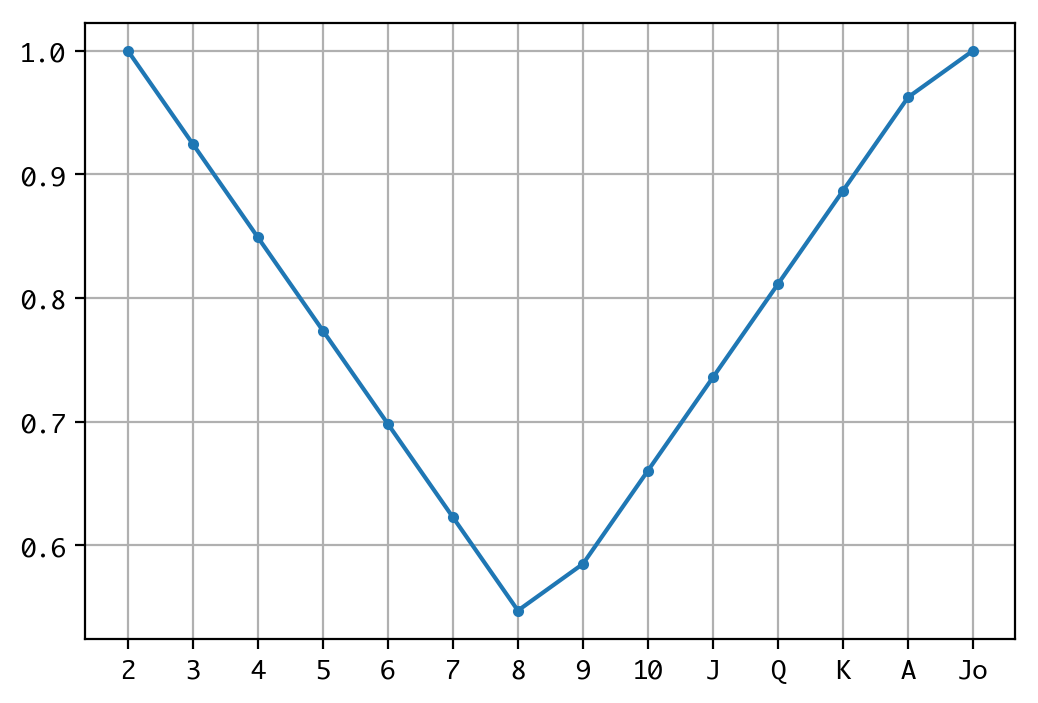

In [13]:
y = [53/53, 49/53, 45/53, 41/53, 37/53, 33/53, 29/53, 31/53, 35/53, 39/53, 43/53, 47/53, 51/53, 53/53]
plt.figure()
plt.plot(Cards, y, marker='.')
plt.grid()
xlabels = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'Jo']
plt.xticks(Cards, xlabels)
plt.show()

### モデル2の訓練、検証

**＜訓練＞**

さて、以下モデル2の訓練に移りましょう。

1. 数値が高いか低いかを予想するモデル
1. 次ラウンドに挑戦するかどうかを判断するモデル


モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 7s 4ms/step - reward: 1.2020
1123 episodes - episode_reward: 2.141 [0.000, 64.000] - loss: 2.280 - mean_q: 4.033

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 10s 5ms/step - reward: 3.4345
574 episodes - episode_reward: 11.967 [0.000, 128.000] - loss: 26.547 - mean_q: 11.810

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 9s 5ms/step - reward: 7.1360
540 episodes - episode_reward: 26.430 [0.000, 512.000] - loss: 136.393 - mean_q: 24.982

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 9s 5ms/step - reward: 13.7600
508 episodes - episode_reward: 54.173 [0.000, 1024.000] - loss: 1019.780 - mean_q: 61.010

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 9s 5ms/step - 

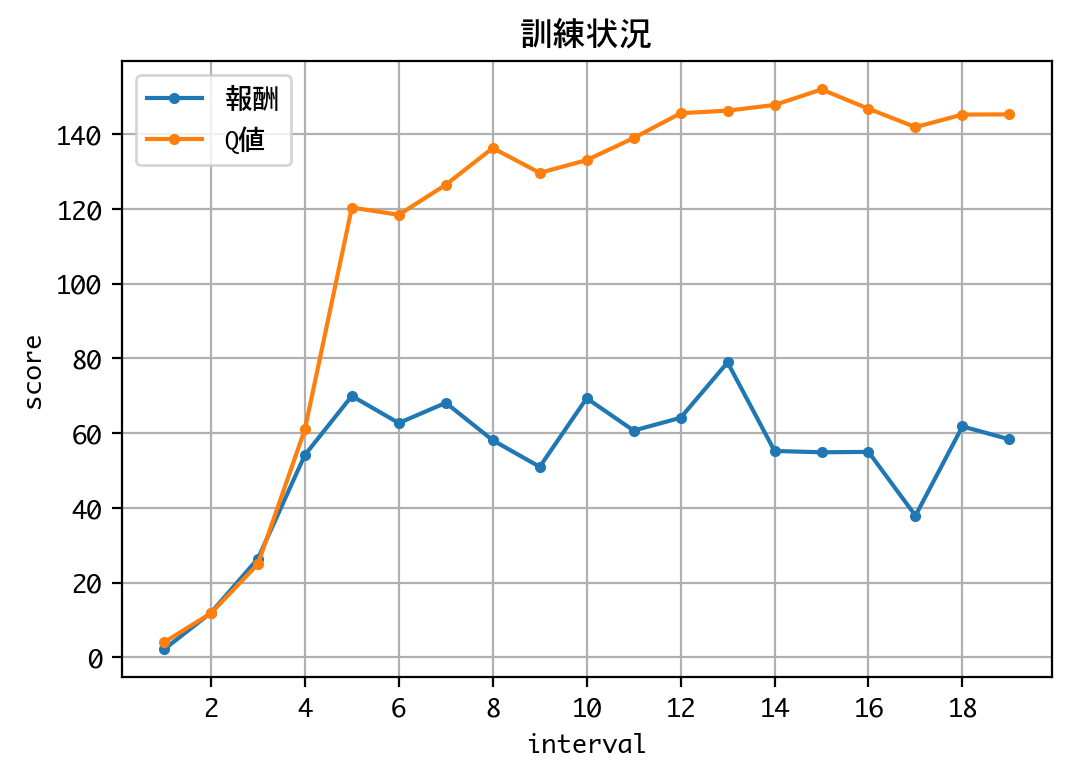

合計獲得枚数(10814回)：546681枚
平均獲得枚数(10814回)：50.55307934159423枚
0枚：9184回（84.92694655076752%）
1枚：489回（4.521916034769743%）
2枚：178回（1.6460144257444054%）
4枚：85回（0.7860181246532273%）
8枚：43回（0.39763269835398557%）
16枚：38回（0.3513963380802663%）
32枚：59回（0.5455890512298872%）
64枚：63回（0.5825781394488626%）
128枚：62回（0.5733308673941188%）
256枚：23回（0.21268725725910856%）
512枚：155回（1.4333271684852968%）
1024枚：435回（4.022563343813575%）


In [4]:
TAKES_A_LOGARITHM_OF_REWARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=False)
h = m2.train(nb_steps=40000, log_interval=2000, verbose=1)
visualize_coin(m2.env)

Q値の推移を見る限り、学習は収束していると考えられるので、訓練を終了し、検証に移ります。

**＜検証＞**

まず、訓練済みモデルを用いて、ダブルアップゲームを10000回試行します。

In [14]:
TAKES_A_LOGARITHM_OF_REWARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
h = m2.test(nb_episodes=10000, visualize=False, verbose=0)
visualize_coin(m2.env)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
合計獲得枚数(10000回)：605184枚
平均獲得枚数(10000回)：60.5184枚
0枚：9409回（94.09%）
1024枚：591回（5.91%）


勝率は5.91%ながらも、その全てが10連続ダブルアップ成功（$2^{10}=1024$）という、極端な結果が出ました。戦略は後で見るとして、この勝率について、みなさん、どういう印象を持たれたでしょうか。

ちなみに、勝率Xの10乗（約8.55%）とは、3ポイント弱の差があります。これは、ラウンド2以降における各カードの出現頻度が、一様ではないためです。

以下に、各カードの出現頻度を保持しつつ、ダブルアップゲームを10万回試行します。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


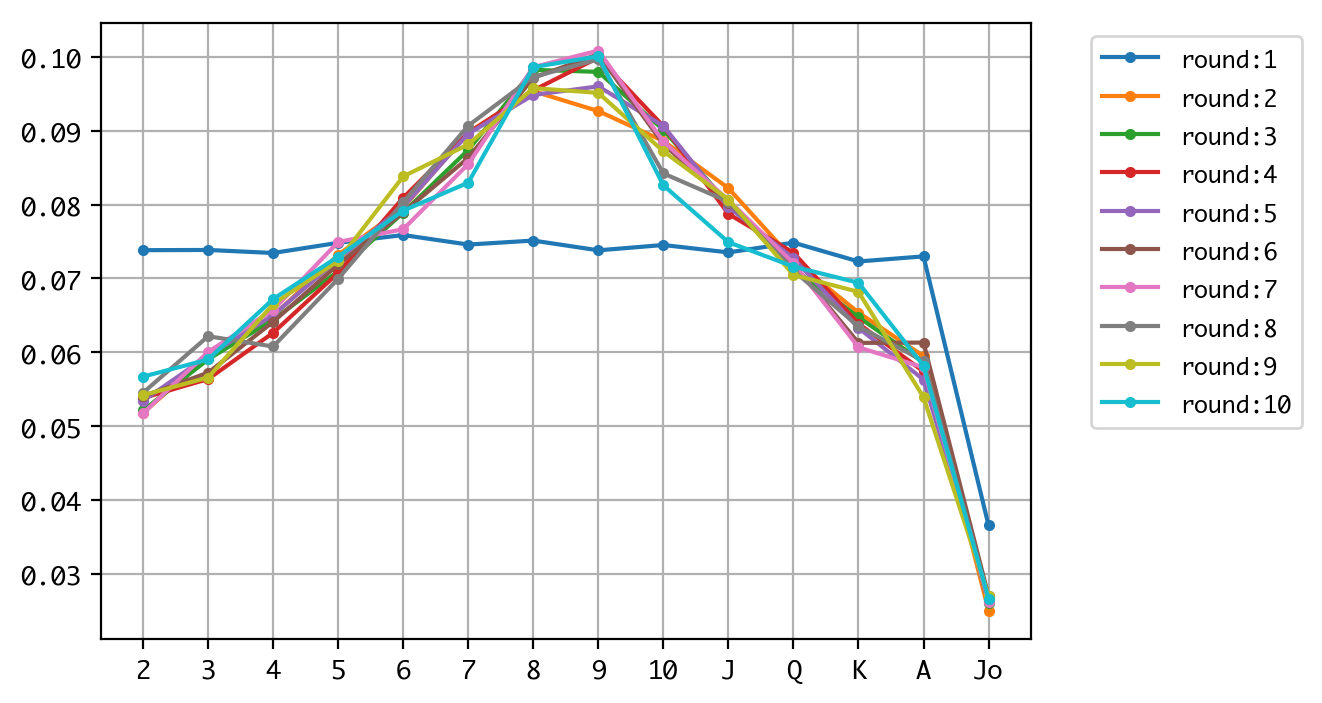

In [2]:
TAKES_A_LOGARITHM_OF_REWARD = False
MEMORIZE_FREQUENCY = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
h = m2.test(nb_episodes=100000, visualize=False, verbose=0)
fqs = m2.env.frequency
trs = np.apply_along_axis(np.sum, 1, fqs)
trs = trs.reshape(trs.size, 1)
fqs = fqs / trs
plt.figure()
rnd = 1
for fq in fqs:
    plt.plot(Cards, fq, marker='.', label=f'round:{rnd}')
    rnd += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid()
xlabels = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'Jo']
plt.xticks(Cards, xlabels)
plt.show()
MEMORIZE_FREQUENCY = False

横軸が各カード、縦軸が出現頻度です。ラウンド2以降、**逆V字カーブ**とでも言うべき形状を描いています。

以下具体例を考えれば、戦略Xのもとで、キャリーオーバールールのために、端のカードより中央のカードの場合の数が多くなることを、理解して頂けるかと思います。

- ラウンド2で2のカードが開いている $\leftrightarrow$ 以下のいずれか
    - ラウンド1で開いていたカードが2、かつ、伏せられていたカードが2
    - ラウンド1で開いていたカードが9〜Joker、かつ、伏せられていたカードが2

- ラウンド2で8のカードが開いている $\leftrightarrow$ 以下のいずれか
    - ラウンド1で開いていたカードが2〜7、かつ、伏せられていたカードが8
    - ラウンド1で開いていたカードが8、かつ、伏せられていたカードが8
    - ラウンド1で開いていたカードが9〜Joker、かつ、伏せられていたカードが8

さて、先ほど、予想的中率がV字カーブを描くことを確認しましたが、ラウンド2以降は、各カードの出現頻度が逆V字カーブを描きます。したがって、勝率がラウンド1より低くなります。勝率Xを10乗してはいけません。

逆に、もし、キャリーオーバールールがなければ、各ラウンドの出現頻度は一様となるので、勝率Xを10乗してもよいはずです。試しに、キャリーオーバールールをなくした状態で、10000回試行してみましょう。

In [15]:
TAKES_A_LOGARITHM_OF_REWARD = False
CARRY_OVER_THE_CARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
h = m2.test(nb_episodes=10000, visualize=False, verbose=0)
visualize_coin(m2.env)
CARRY_OVER_THE_CARD = True

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
合計獲得枚数(10000回)：883712枚
平均獲得枚数(10000回)：88.3712枚
0枚：9137回（91.37%）
1024枚：863回（8.63%）


今度は勝率が8.63%となり、勝率Xの10乗（約8.55%）に近しい値となりました。

戦略Xは、予想的中率を最大にする戦略と考えられますが、キャリーオーバールールのために、予想的中率の低い8や9の出現頻度が高くなるあたり、よくできたゲームバランスと言えるでしょう。よくできたゲームには、よくできたルールが存在するものです。

さて、少し脇道にそれてしまったようです。Q値を確認し、このモデルが学習した戦略を確認しましょう。

ラウンド数とカードを横軸に、Q値を縦軸に、グラフにまとめます。結論を先取りすれば、全てのグラフが同じ傾向を示していますので、一つひとつのグラフを見て頂く必要はありません。俯瞰して頂ければ十分です。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


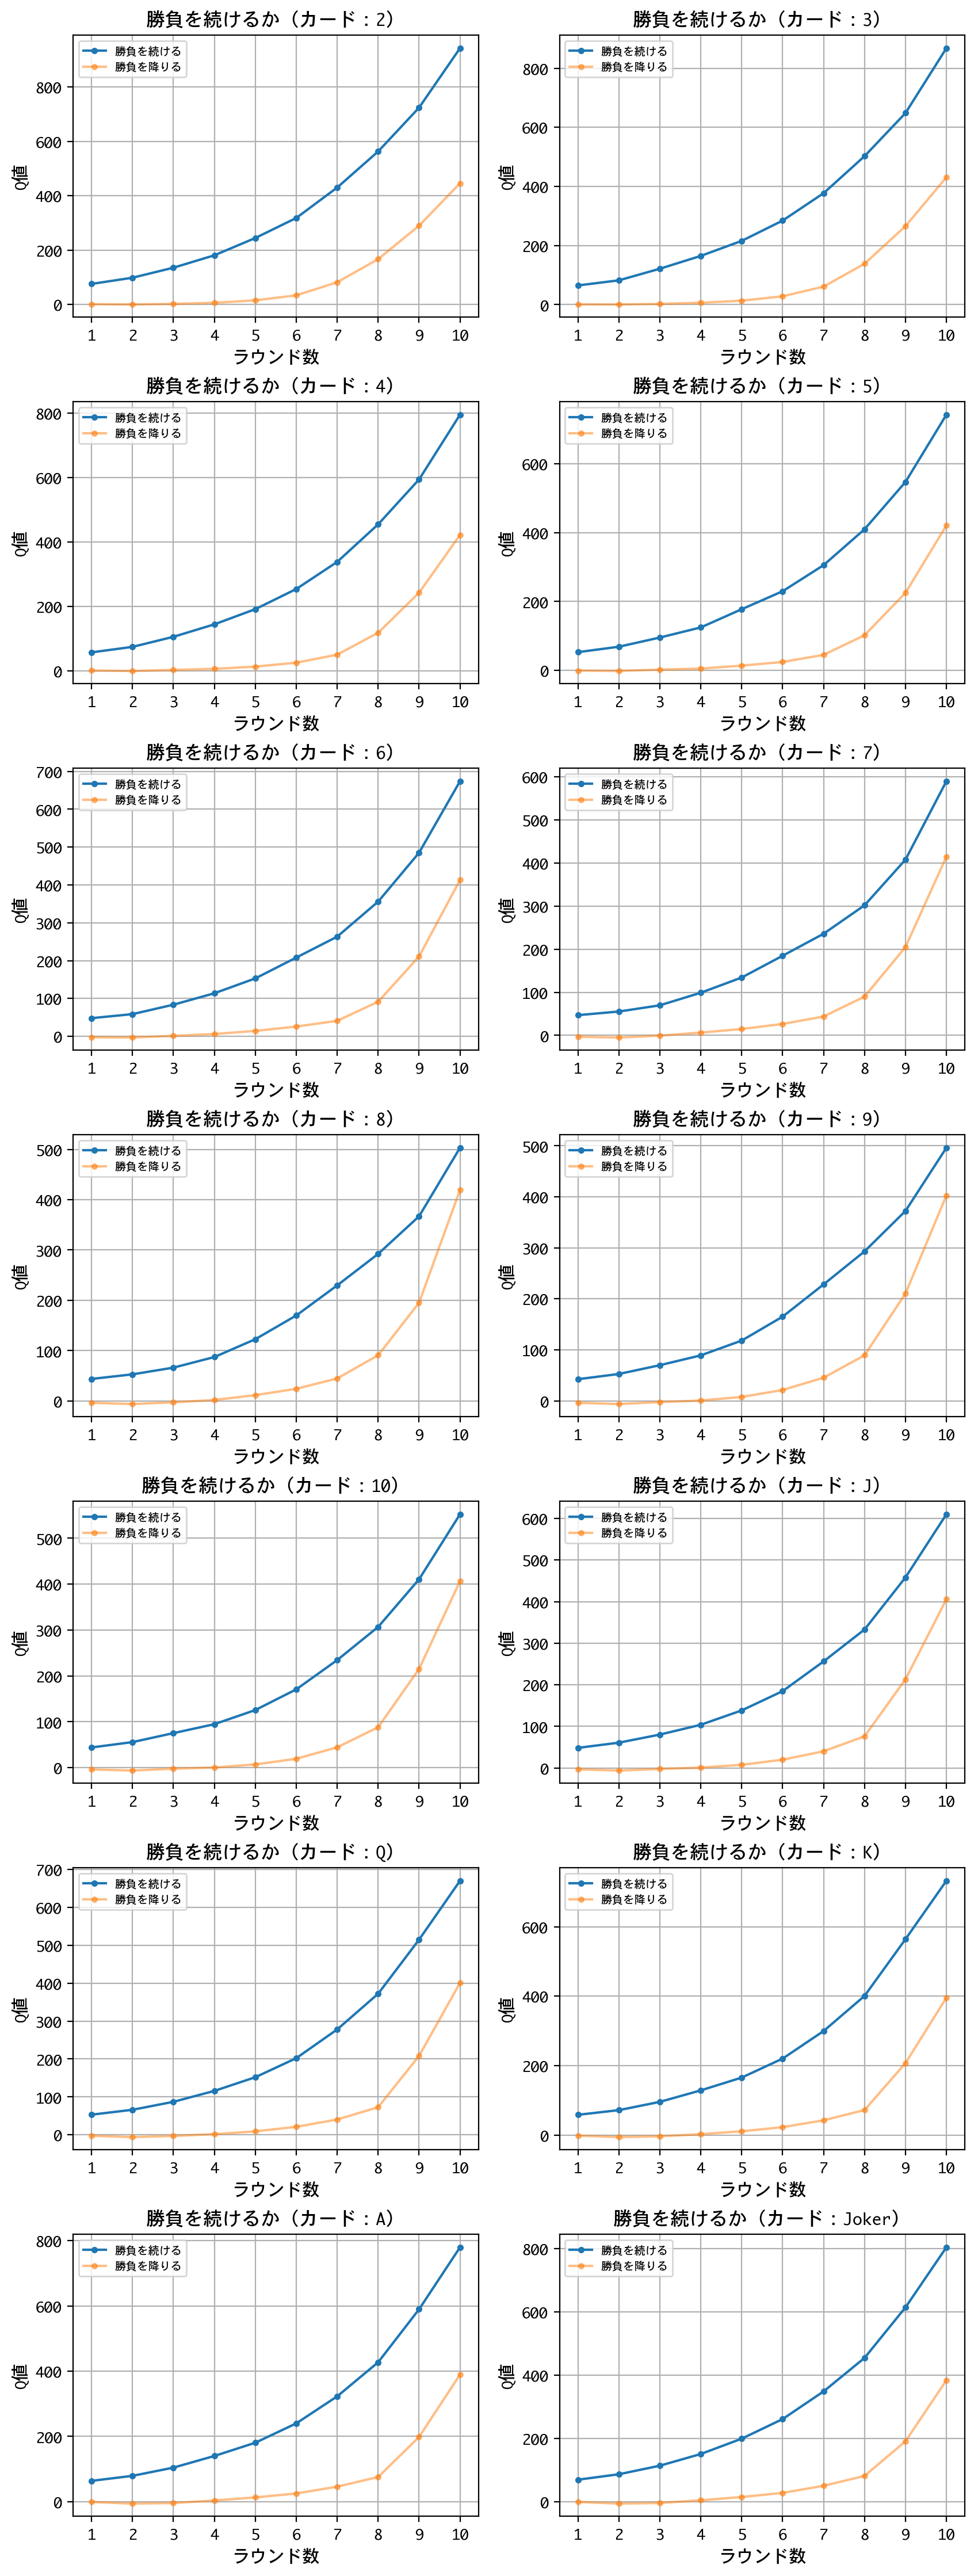

In [5]:
TAKES_A_LOGARITHM_OF_REWARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
visualize_q_will_per_round(m2)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


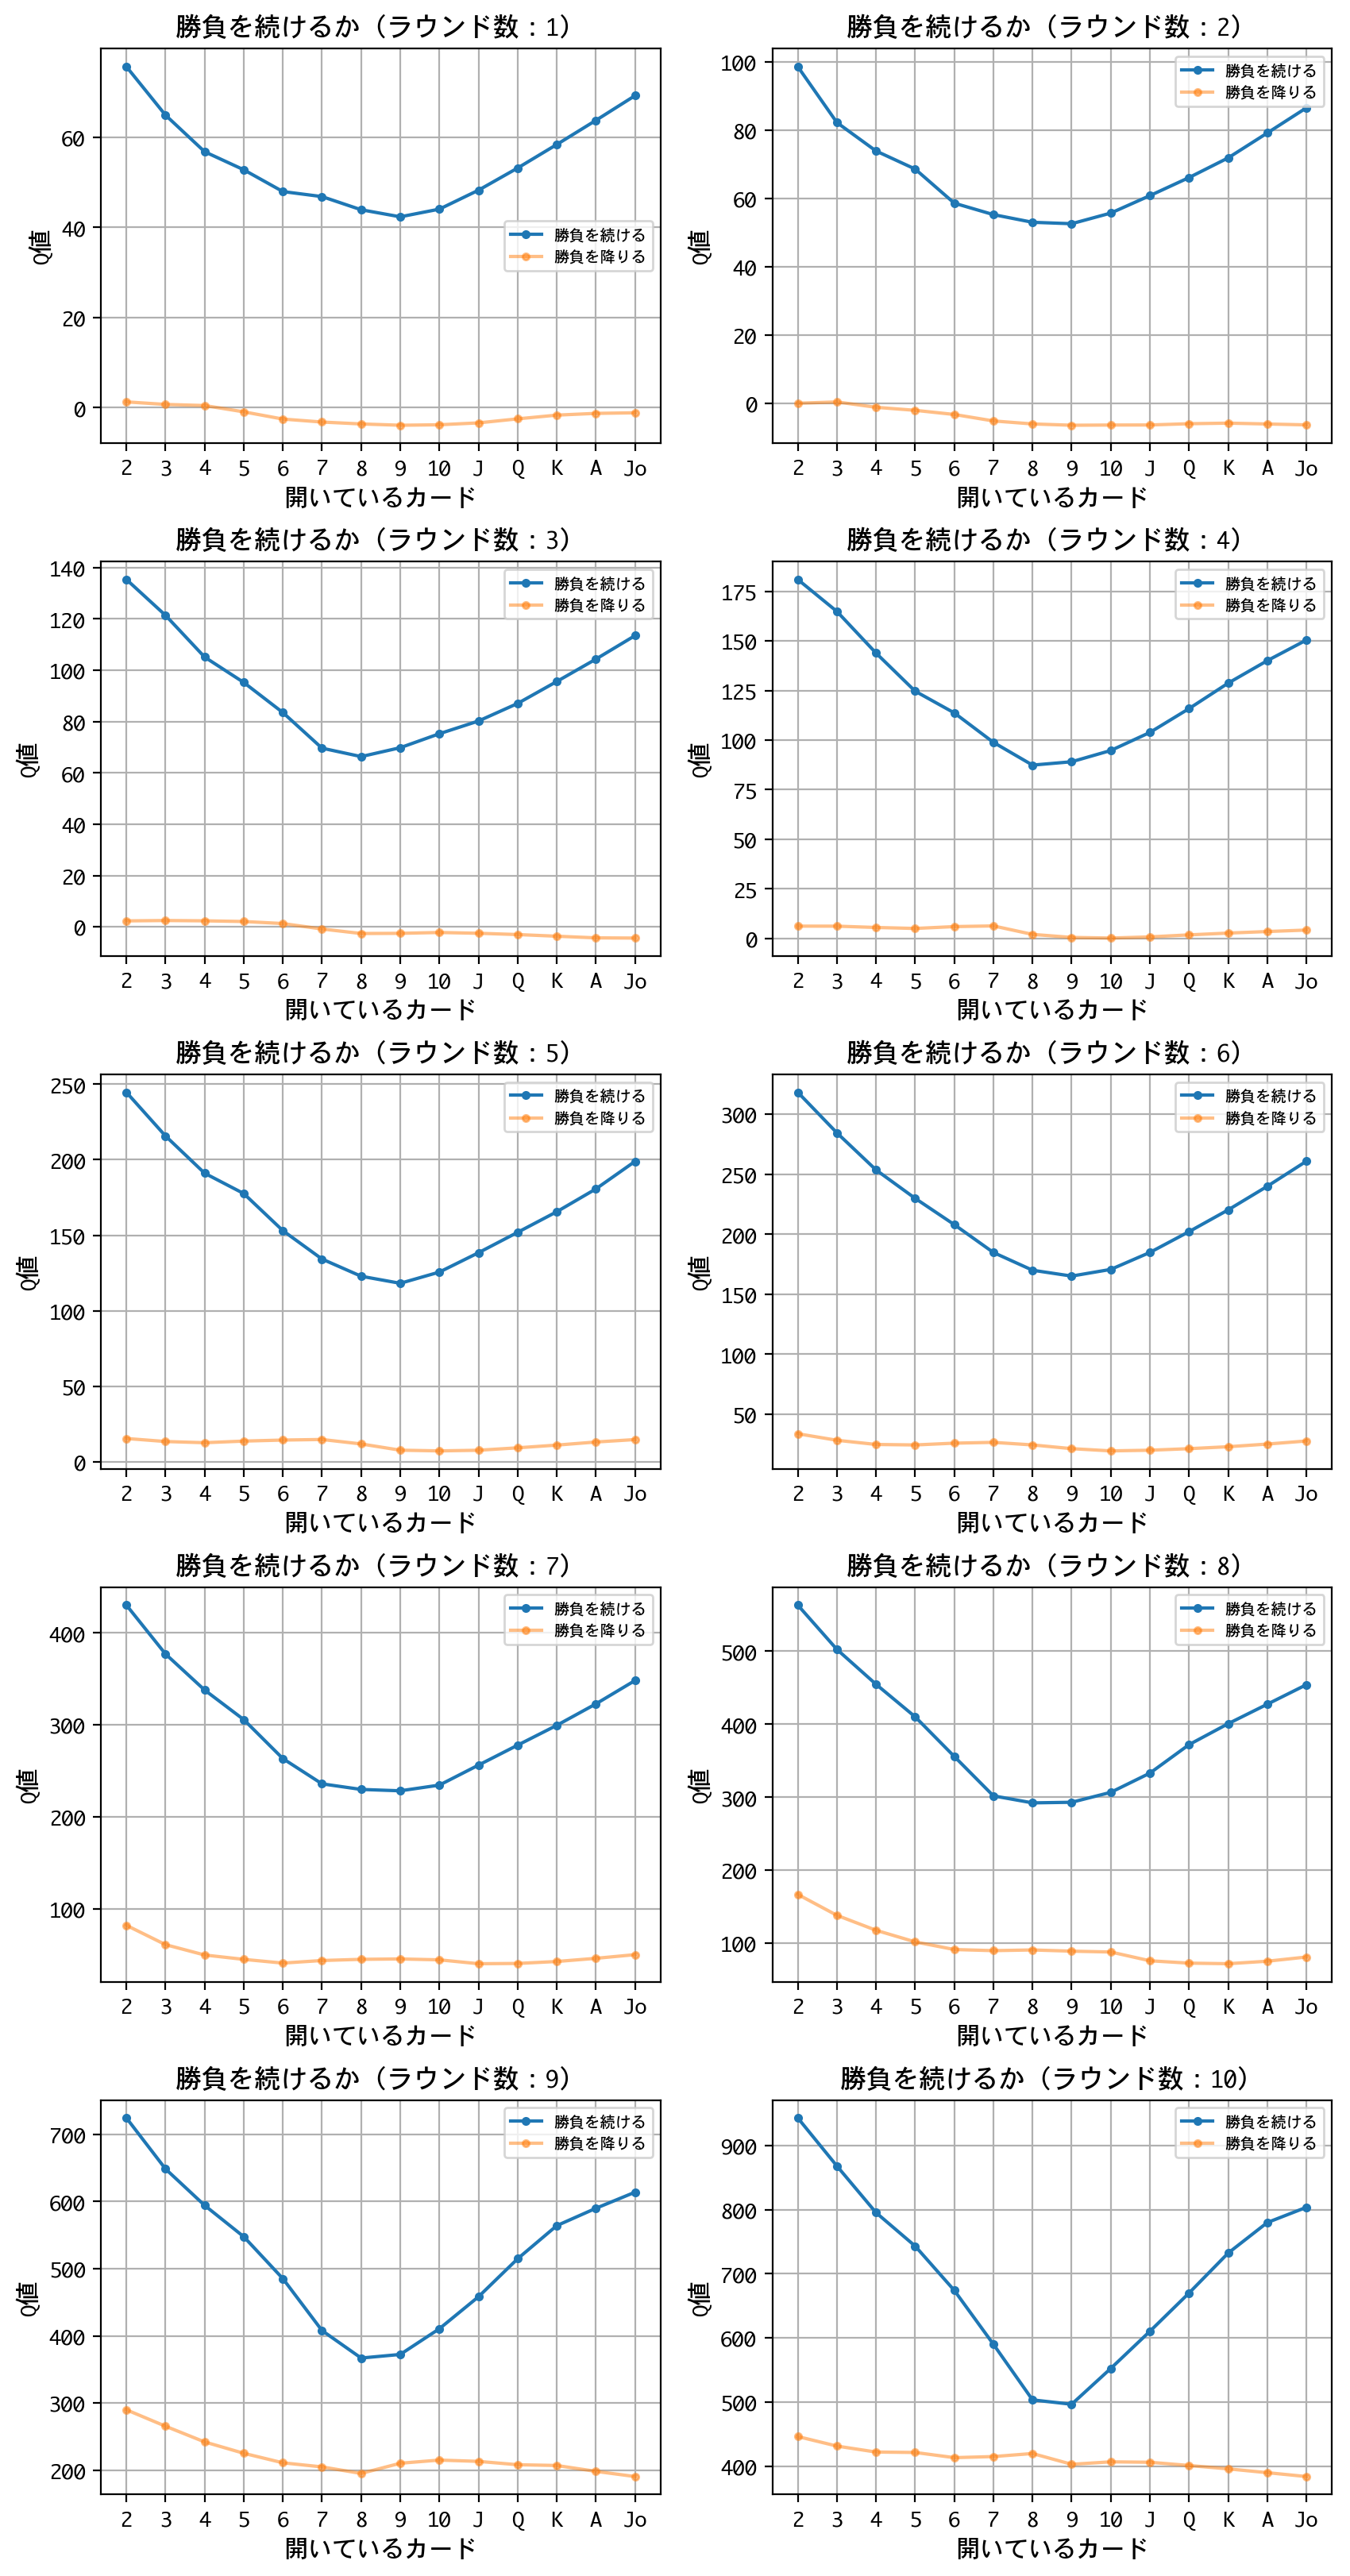

In [6]:
TAKES_A_LOGARITHM_OF_REWARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
visualize_q_will_per_card(m2)

これらのグラフは、一言で言えば、上限回数までダブルアップを繰り返す戦略を示しています。当然、負けが込みますが、たまに大当たりを引くので、長期的に見れば、利益が最大化されるということでしょう。借金してでもギャンブルを続けろと言っているようでもあり、あるいは、富める者はさらに富むと言っているようでもあります。ギャンブル、あるいは、貪欲（greedy）のGをとり、この戦略を**戦略G**と名付けることにしましょう。

戦略Gが理論的に妥当かどうか、私には証明できません。

一つ言えるのは、戦略Gのもとで、安定して利益を上げるには、それなりの試行回数が必要という点です。試行回数を1〜50まで変化させつつ、シミュレーションしてみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


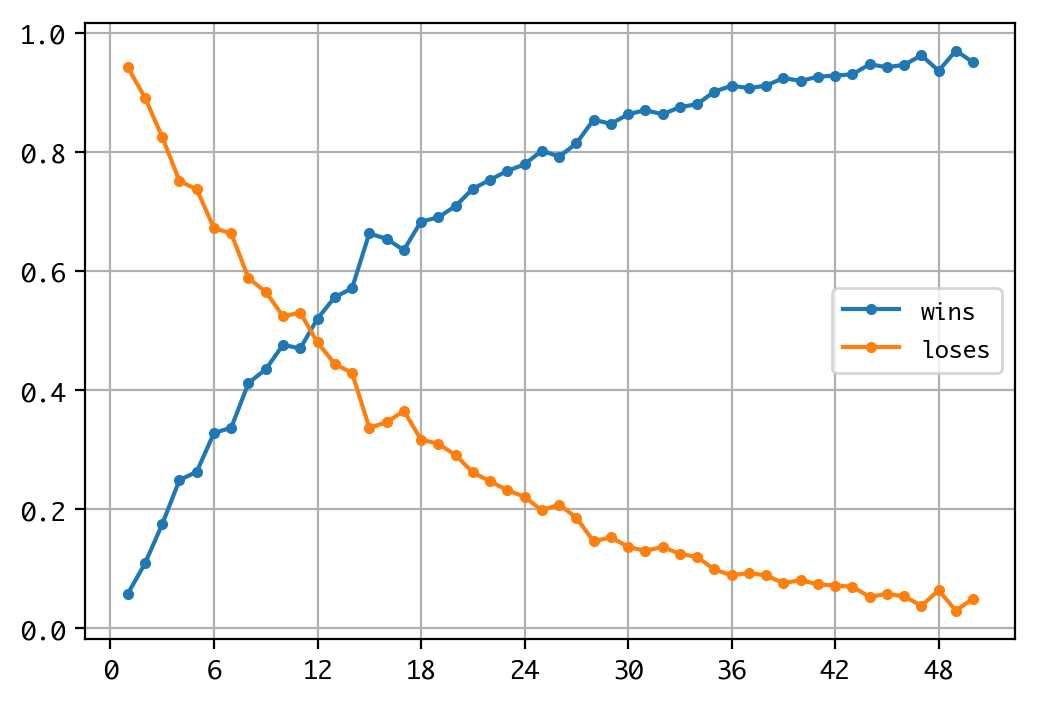

In [2]:
TAKES_A_LOGARITHM_OF_REWARD = False
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
xs = range(1, 51)
wins = []
loses = []
for x in xs:
    rwds = []
    for _ in range(1000):
        h = m2.test(nb_episodes=x, visualize=False, verbose=0)
        rwds.append(sum(h.history['episode_reward']))
    wins.append(sum(1 for rwd in rwds if rwd > 0.) / len(rwds))
    loses.append(sum(1 for rwd in rwds if rwd == 0.) / len(rwds))
plt.figure()
plt.plot(xs, wins, marker='.', label='wins')
plt.plot(xs, loses, marker='.', label='loses')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

横軸が試行回数、縦軸が勝ち負けの頻度です。試行回数11〜12あたりで勝敗が逆転します。試行回数20あたりで勝つ頻度が七割程度になりますが、それでも七割です。20連敗する可能性は十分にあります。そして、このグラフのカーブは次第に緩やかとなり、試行回数50でも勝率が100%に達することはありません。おそらく、試行回数を限りなく増加させたときの極限値として、勝率は100%に達するのでしょう。

戦略Gのもとで利益を上げるには、それ相応の試行回数が必要です。もっと言えば、期待値にもとづく合理的思考と、それを貫くだけの忍耐力と軍資金、および、最悪のケースを引かない**運**が必要となるのでしょう。

さて、戦略Gの検証は以上とし、実験2に移ります。

## 実験2

報酬を「ゲーム終了時に保有しているコインの枚数の**対数**（ただし、0は0）」とした場合の実験です。

### モデル1の訓練、検証

**＜訓練＞**

以下モデル1の訓練を行います。

1. 数値が高いか低いかを予想するモデル
1. 次ラウンドに挑戦するかどうかを判断するモデル


モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 20000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 1s 1ms/step - reward: 0.5540
1000 episodes - episode_reward: 0.554 [0.000, 1.000]

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 0.5940
1000 episodes - episode_reward: 0.594 [0.000, 1.000] - loss: 0.086 - mean_q: 0.768

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 0.5990
1000 episodes - episode_reward: 0.599 [0.000, 1.000] - loss: 0.079 - mean_q: 0.786

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 8s 8ms/step - reward: 0.6150
1000 episodes - episode_reward: 0.615 [0.000, 1.000] - loss: 0.080 - mean_q: 0.783

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 7s 7ms/step - reward: 0.6130
1000 episodes - episode_reward: 0.613 [0.000, 1.000] - loss: 0.080 - mean_q: 0.785

Inte

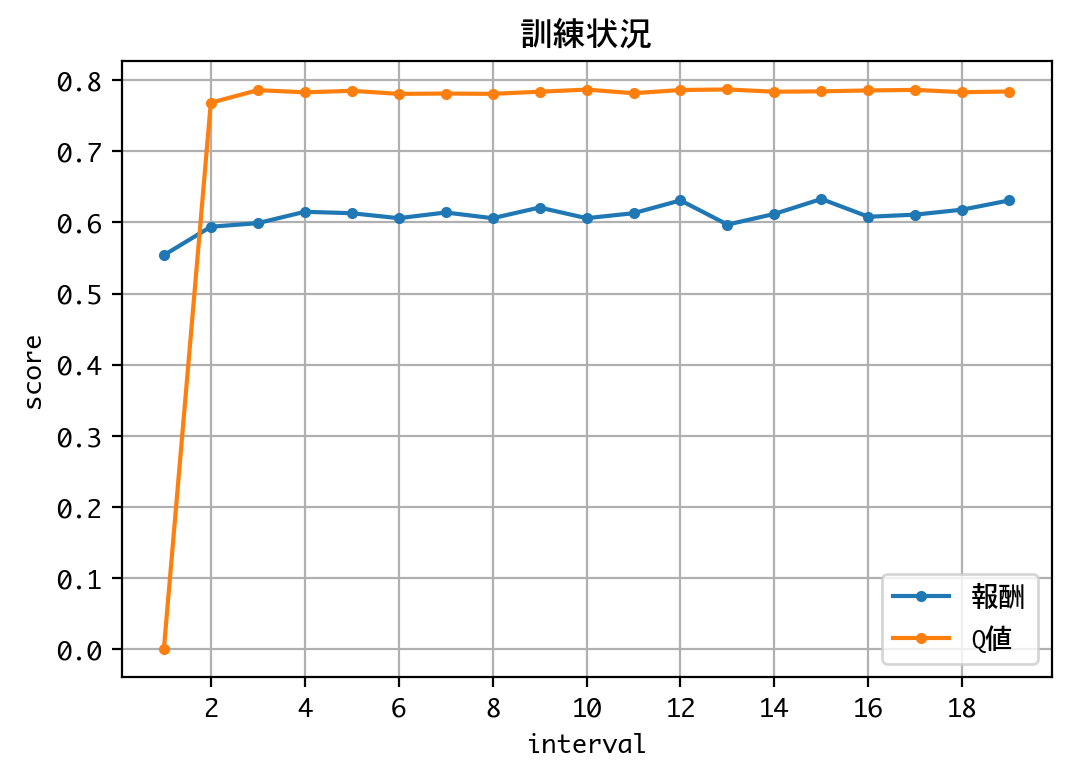

合計獲得枚数(20000回)：24370枚
平均獲得枚数(20000回)：1.2185枚
0枚：7815回（39.075%）
2枚：12185回（60.925%）


In [7]:
TAKES_A_LOGARITHM_OF_REWARD = True
m = DQNDoubleUpOne(recycle=False)
h = m.train(nb_steps=20000, log_interval=1000, verbose=1)
visualize_coin(m.env)

Q値の推移を見る限り、学習は収束していると考えられるので、訓練を終了し、検証に移ります。

**＜検証＞**

まず、訓練済みモデルを用いて、数値が高いか低いかの予想を10000回試行します。

In [3]:
TAKES_A_LOGARITHM_OF_REWARD = True
m = DQNDoubleUpOne(recycle=True)
h = m.test(nb_episodes=10000, visualize=False, verbose=0)
visualize_coin(m.env)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
合計獲得枚数(10000回)：15490枚
平均獲得枚数(10000回)：1.549枚
0枚：2255回（22.55%）
2枚：7745回（77.45%）


予想的中率は77.45%でした。実験1（78.6%）、あるいは、勝率X（約78.2%）と近しい数値と言えます。

次に、Q値を見てみます。Q値を見ることで、このモデルが学習した戦略を見ることができます。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
0.5484633
0.46849802


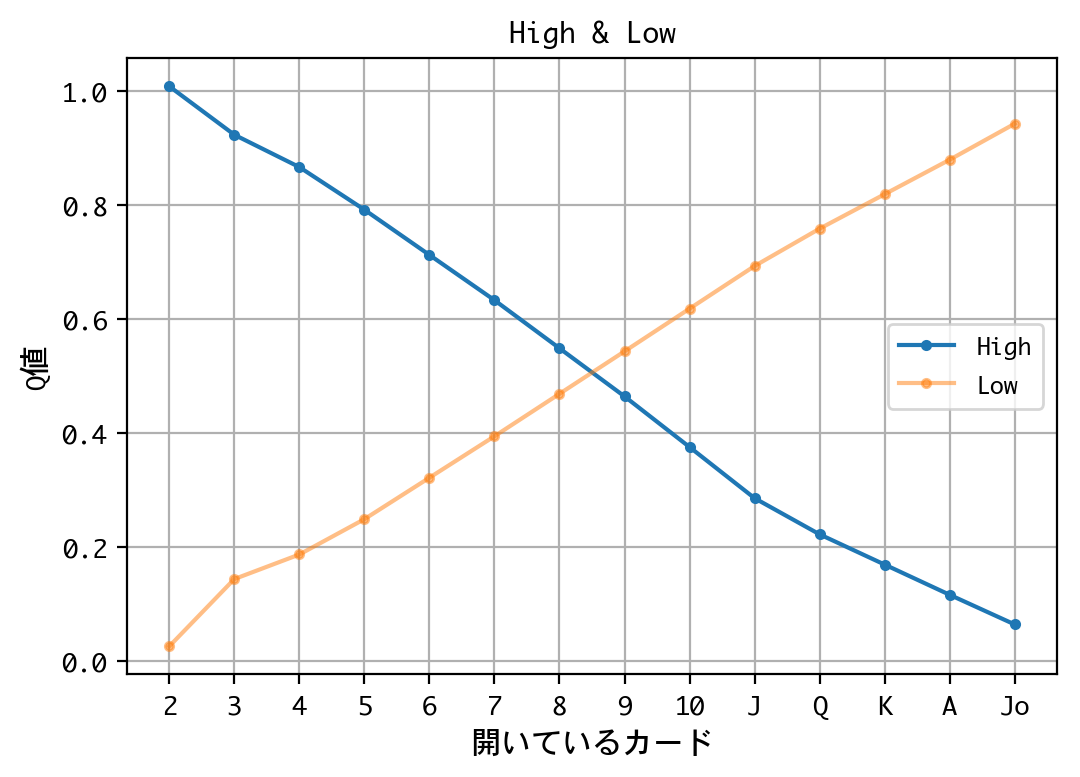

In [8]:
TAKES_A_LOGARITHM_OF_REWARD = True
m = DQNDoubleUpOne(recycle=True)
print(m.dqn.compute_q_values([[Cards.EIGHT]])[Bet.HIGH])
print(m.dqn.compute_q_values([[Cards.EIGHT]])[Bet.LOW])
visualize_q_bet(m)

X状のグラフになりました。実験1と同じです。モデル1については、報酬がゼロサムなので、対数をとろうが結果は変わりません。

### モデル2の訓練、検証

**＜訓練＞**

さて、以下モデル2の訓練に移りましょう。

1. 数値が高いか低いかを予想するモデル
1. 次ラウンドに挑戦するかどうかを判断するモデル


モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 9s 5ms/step - reward: 0.3655
1060 episodes - episode_reward: 0.690 [0.000, 7.000] - loss: 0.224 - mean_q: 1.466

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 13s 7ms/step - reward: 0.4205
908 episodes - episode_reward: 0.926 [0.000, 9.000] - loss: 0.324 - mean_q: 1.840

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 13s 6ms/step - reward: 0.4230
894 episodes - episode_reward: 0.946 [0.000, 7.000] - loss: 0.346 - mean_q: 1.886

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 12s 6ms/step - reward: 0.4305
893 episodes - episode_reward: 0.964 [0.000, 8.000] - loss: 0.360 - mean_q: 1.927

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 12s 6ms/step - reward: 0.4155
908

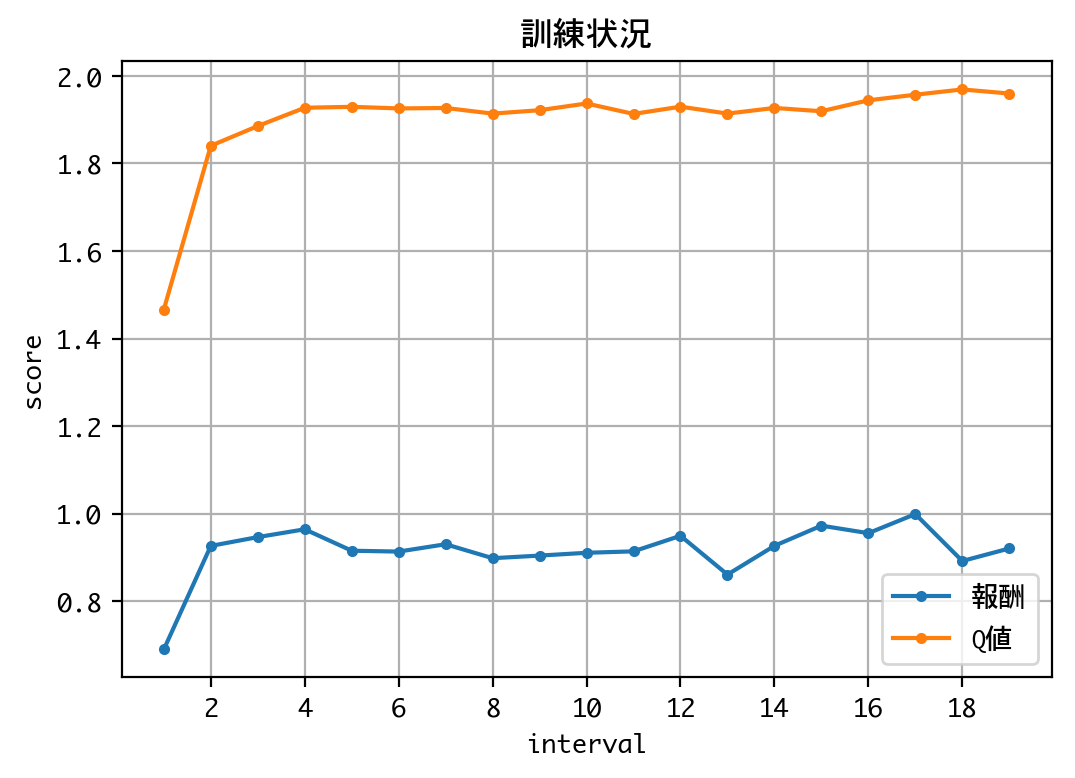

合計獲得枚数(18275回)：58624枚
平均獲得枚数(18275回)：3.2078796169630643枚
0枚：6044回（33.07250341997264%）
1枚：3894回（21.3077975376197%）
2枚：3639回（19.912448700410398%）
4枚：2461回（13.466484268125855%）
8枚：1287回（7.042407660738714%）
16枚：605回（3.310533515731874%）
32枚：241回（1.3187414500683994%）
64枚：75回（0.4103967168262654%）
128枚：22回（0.12038303693570451%）
256枚：5回（0.027359781121751026%）
512枚：2回（0.01094391244870041%）


In [9]:
TAKES_A_LOGARITHM_OF_REWARD = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=False)
h = m2.train(nb_steps=40000, log_interval=2000, verbose=1)
visualize_coin(m2.env)

Q値の推移を見る限り、学習は収束していると考えられるので、訓練を終了し、検証に移ります。

**＜検証＞**

まず、訓練済みモデルを用いて、ダブルアップゲームを10000回試行します。

In [2]:
TAKES_A_LOGARITHM_OF_REWARD = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
h = m2.test(nb_episodes=10000, visualize=False, verbose=0)
visualize_coin(m2.env)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
合計獲得枚数(10000回)：77520枚
平均獲得枚数(10000回)：7.752枚
0枚：5625回（56.25%）
4枚：1124回（11.24%）
8枚：1406回（14.06%）
16枚：1065回（10.65%）
32枚：504回（5.04%）
64枚：185回（1.85%）
128枚：69回（0.69%）
256枚：15回（0.15%）
512枚：6回（0.06%）
1024枚：1回（0.01%）


勝率は43.75%に達しました。これは、実験1（5.91%）よりも、はるかに高い数値です。しかし、得られたコインの枚数は77520枚で、実験1（605184枚）よりも一桁少ない数値となりました。報酬を変えただけですが、実験1とは対極的な結果が得られました。

さて、Q値を確認し、このモデルが学習した戦略を確認しましょう。

ラウンド数とカードを横軸に、Q値を縦軸に、グラフにまとめます。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


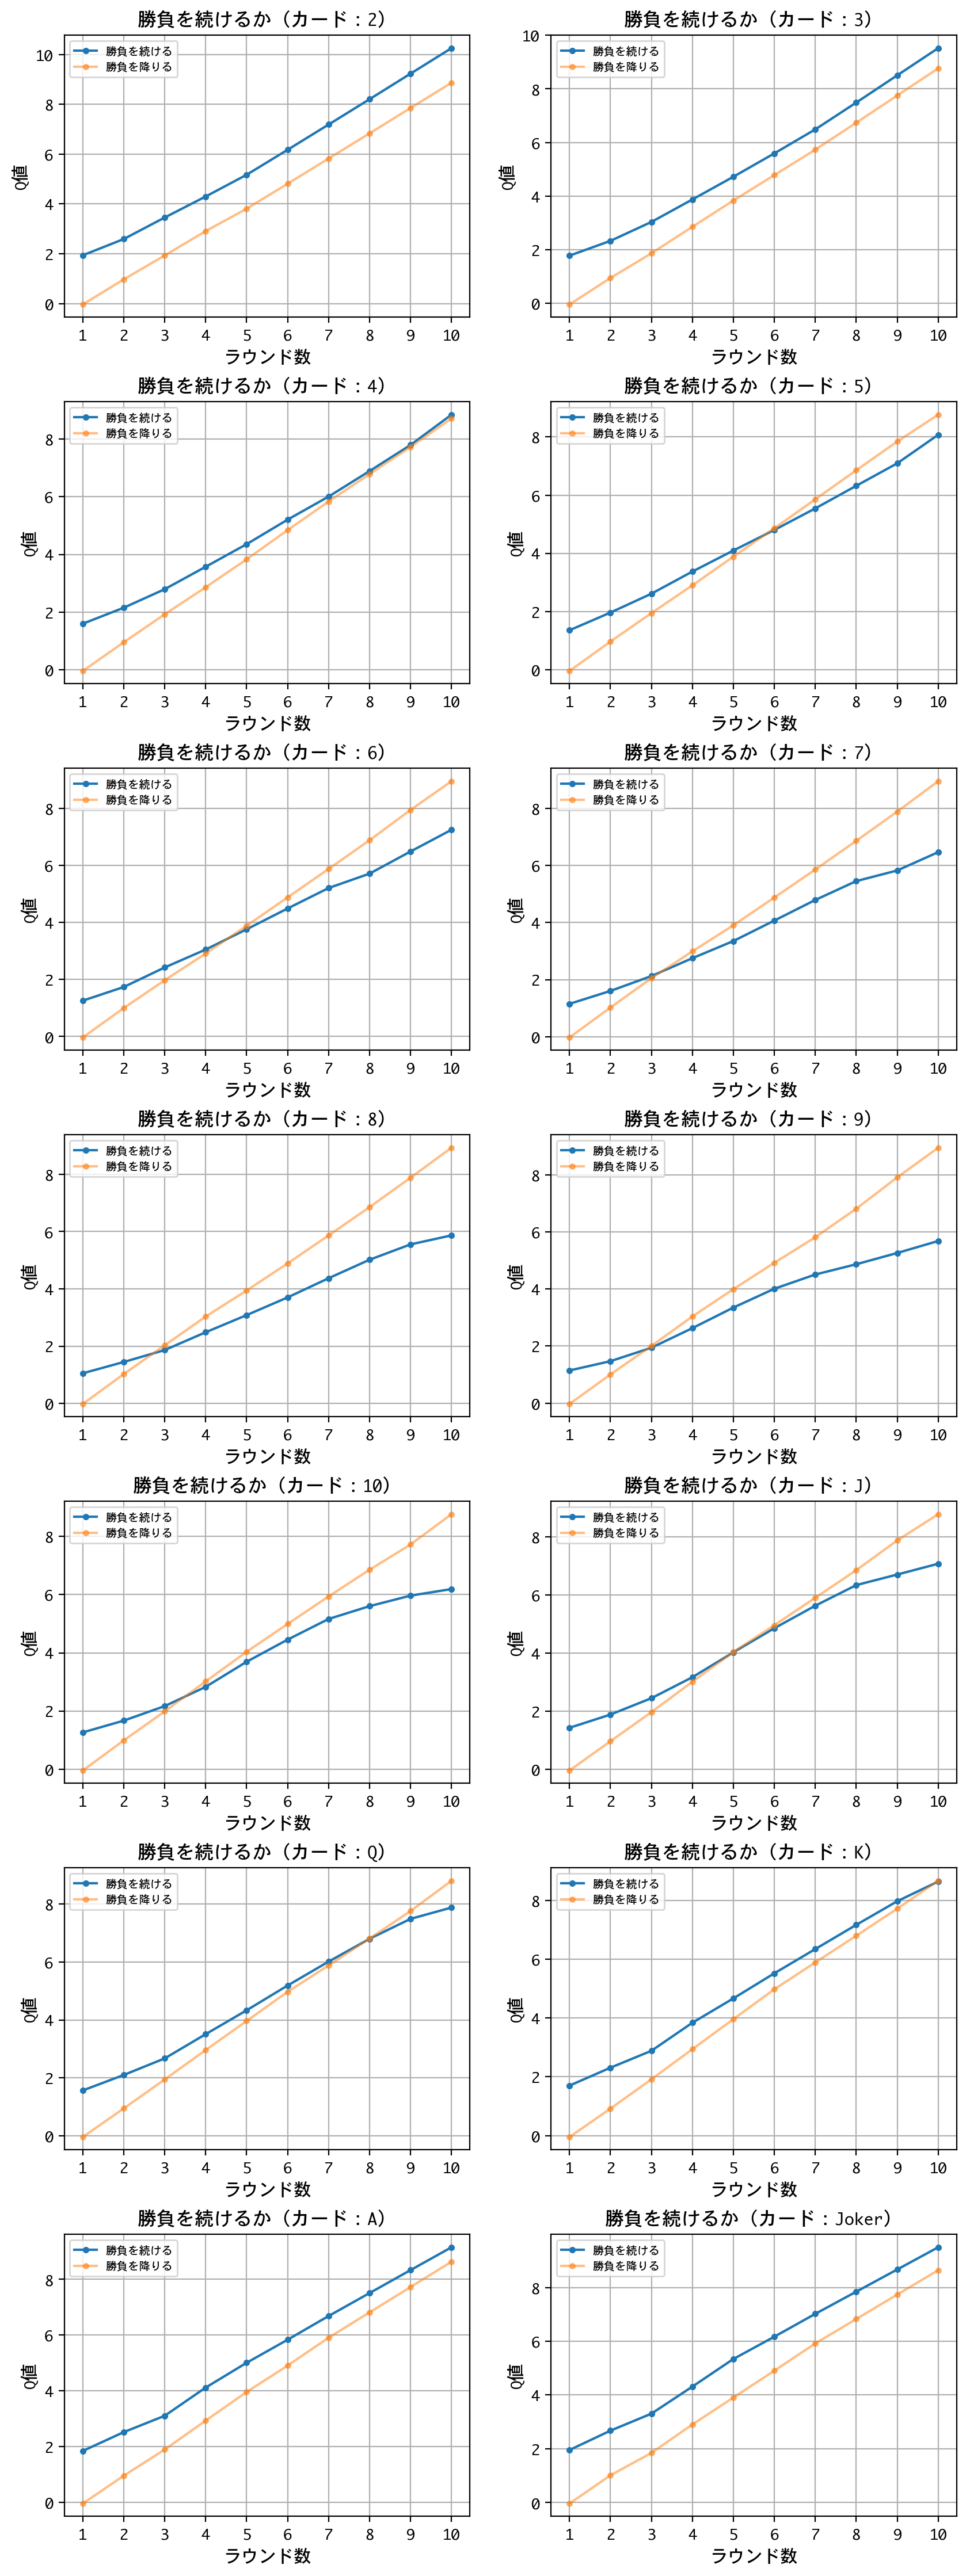

In [10]:
TAKES_A_LOGARITHM_OF_REWARD = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
visualize_q_will_per_round(m2)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


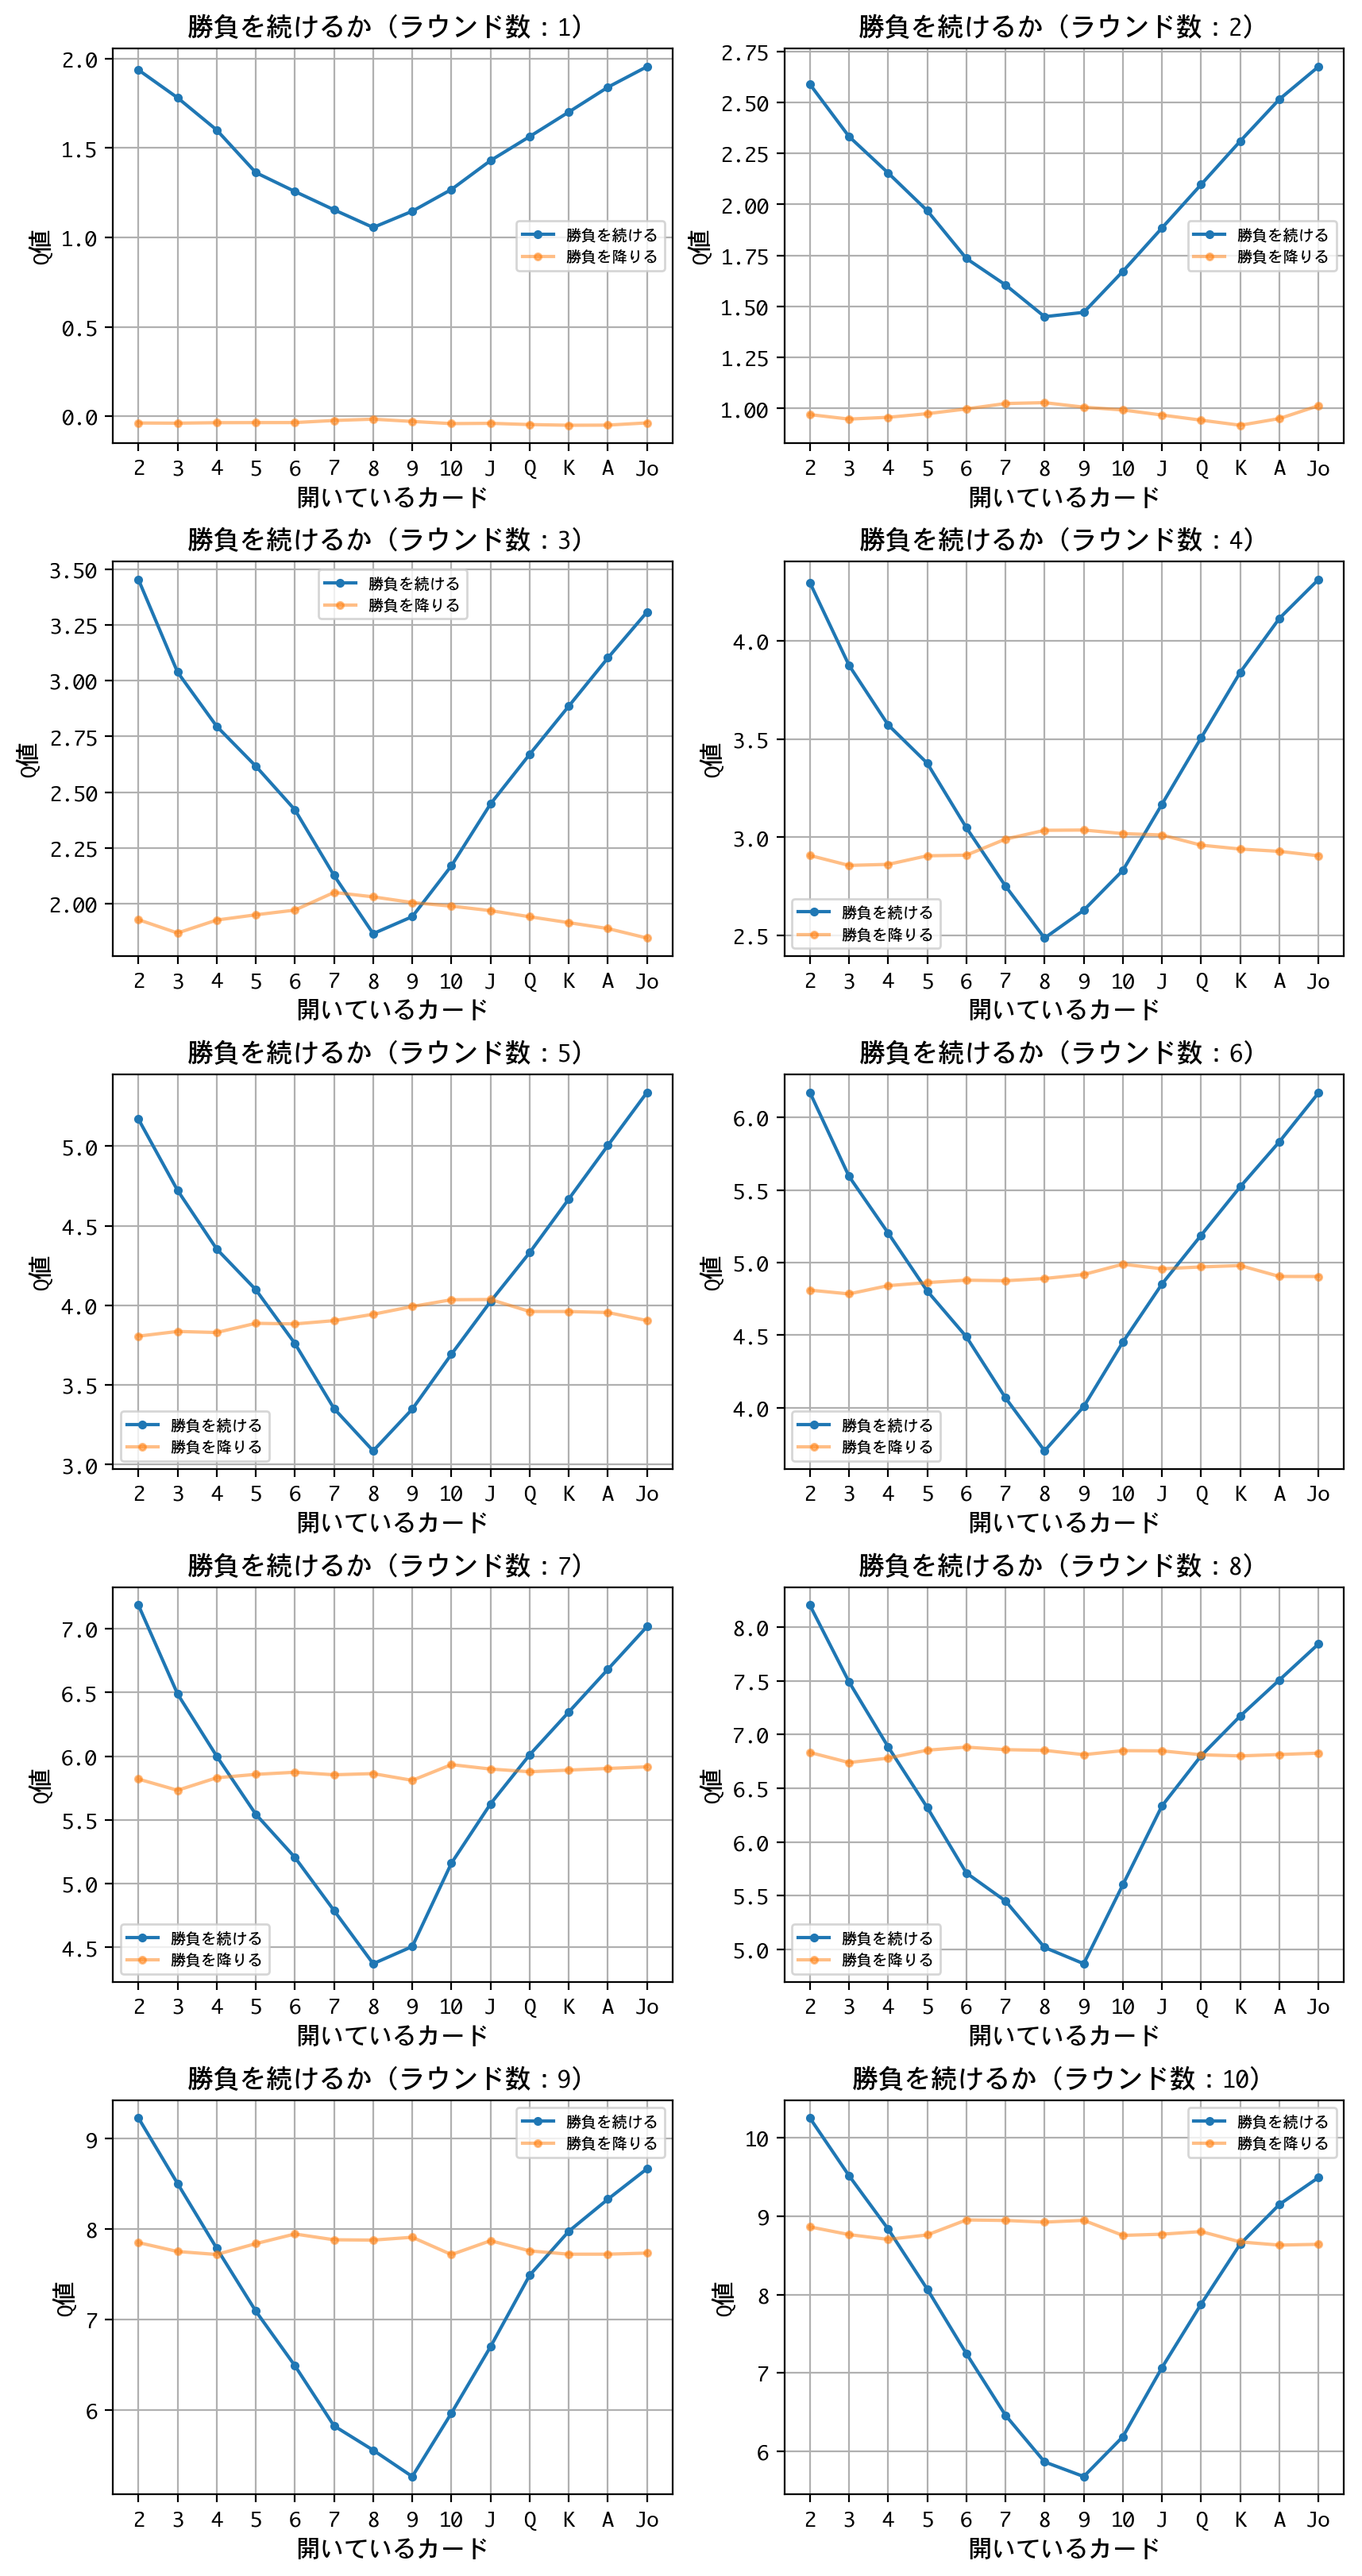

In [11]:
TAKES_A_LOGARITHM_OF_REWARD = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
visualize_q_will_per_card(m2)

これらのグラフは、一言で言えば、開いているカードの数値によっては勝負を降り、利益を確定する戦略を示しています。（ラウンド数を重ねるほど、降りるべき数値は増える。）

[プロスペクト理論](https://ja.wikipedia.org/wiki/%E3%83%97%E3%83%AD%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E7%90%86%E8%AB%96)によると、人間は、目の前に利益があると、利益が手に入らないというリスクの回避を優先するといいます。このモデルが学習した戦略は、人間らしい戦略と言えるでしょう。人間（Human）のHをとり、この戦略を**戦略H**と名付けることにしましょう。

戦略Hについても、試行回数を変化させつつ、シミュレーションしてみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。


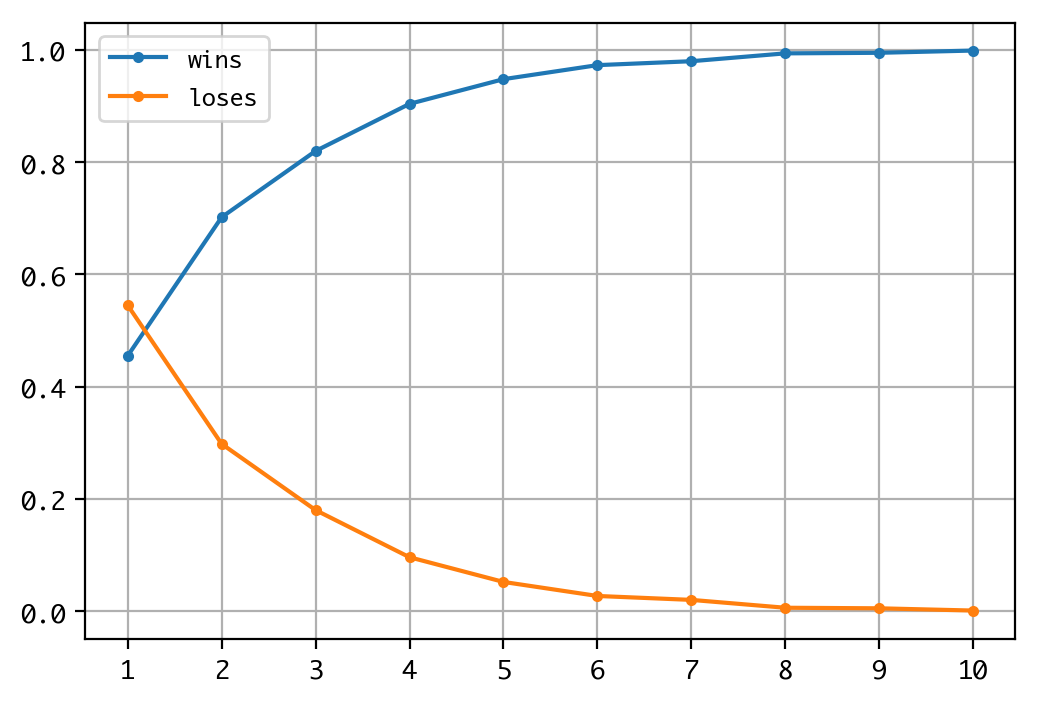

In [4]:
TAKES_A_LOGARITHM_OF_REWARD = True
m1 = DQNDoubleUpOne(recycle=True)
m2 = DQNDoubleUp(m1, recycle=True)
xs = range(1, 11)
wins = []
loses = []
for x in xs:
    rwds = []
    for _ in range(1000):
        h = m2.test(nb_episodes=x, visualize=False, verbose=0)
        rwds.append(sum(h.history['episode_reward']))
    wins.append(sum(1 for rwd in rwds if rwd > 0.) / len(rwds))
    loses.append(sum(1 for rwd in rwds if rwd == 0.) / len(rwds))
plt.figure()
plt.plot(xs, wins, marker='.', label='wins')
plt.plot(xs, loses, marker='.', label='loses')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

横軸が試行回数、縦軸が勝ち負けの頻度です。戦略Gと比べ、極めて速いスピードで、勝率100%に漸近しているのがわかります。もちろん、戦略Gと異なり、小さい勝ちから大きい勝ちまで含まれています。

戦略Hは、長期の利益最大化より、短期の資金繰りを重視する戦略とも言えます。以下に、短期（試行回数：10）のシミュレーションを、戦略G、Hのそれぞれについて、10回ずつ同時並行に行い、成績を比較してみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
モデルを作成します。
モデルを作成しました。
訓練済み重

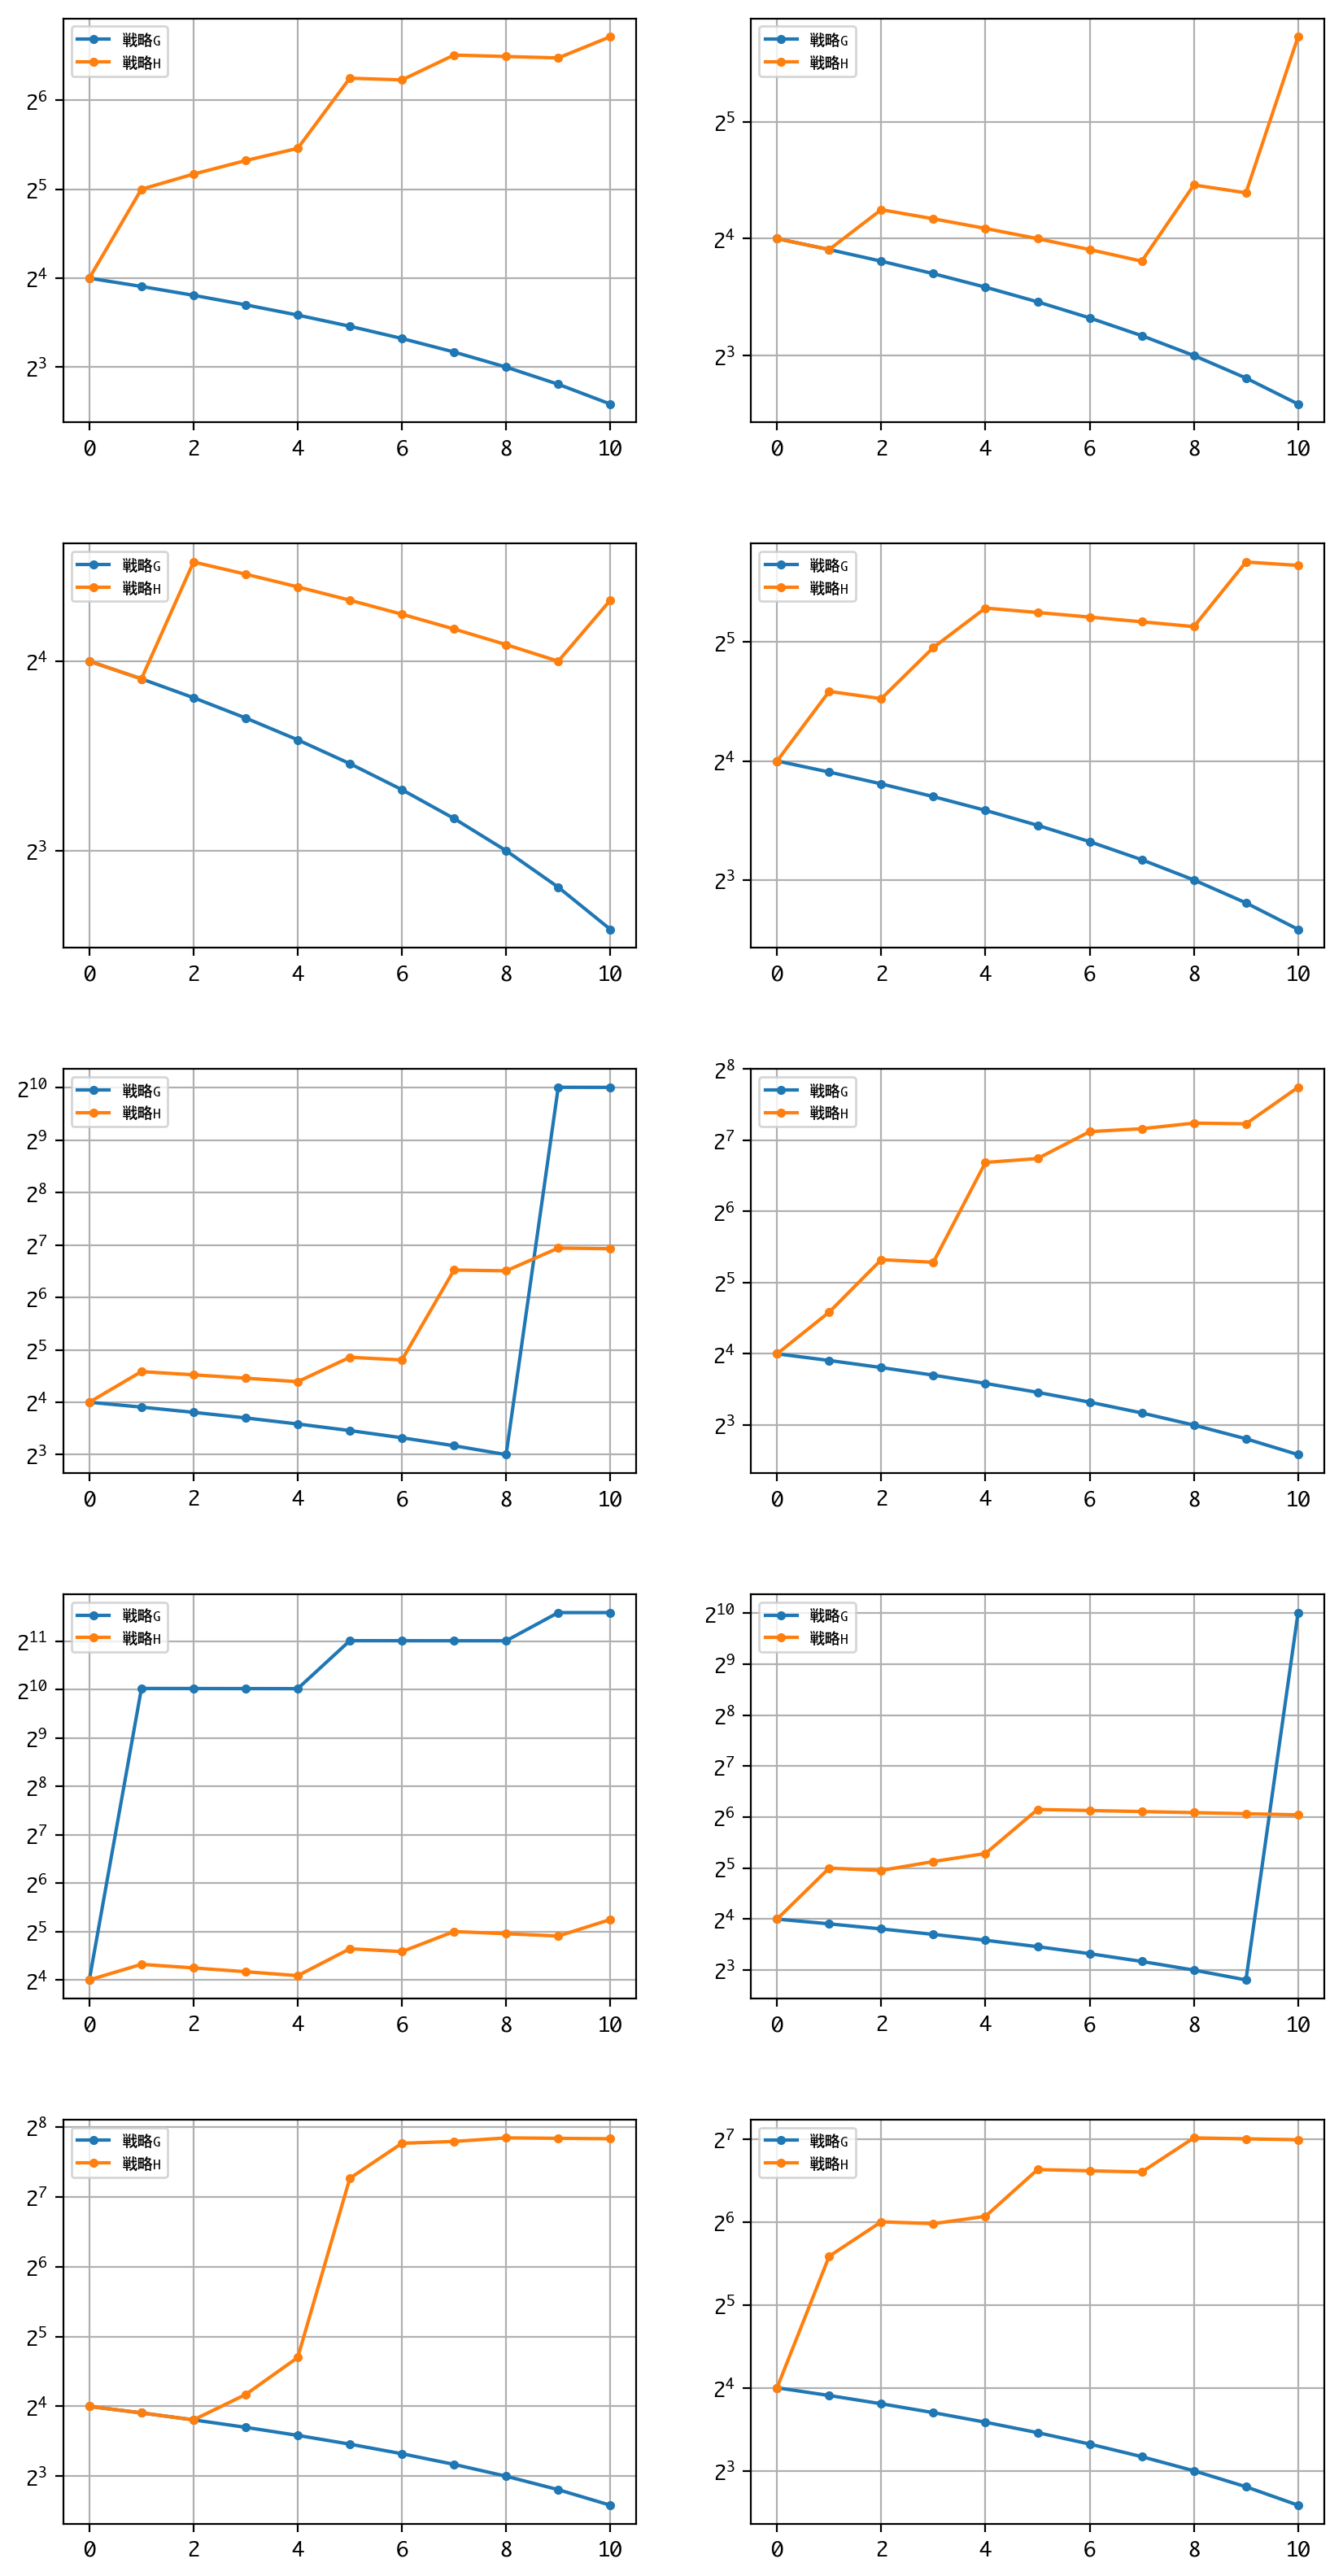

In [10]:
MEMORIZE_TRANSITION = True

m1 = DQNDoubleUpOne(recycle=True)
TRIALS = 10
row = (TRIALS + 1) // 2
col = 2
plt.figure(figsize=(10, 4 * row))
plt.subplots_adjust(wspace=0.2,hspace=0.3)

for trial in range(1, TRIALS + 1):
    TAKES_A_LOGARITHM_OF_REWARD = False
    mg = DQNDoubleUp(m1, recycle=True)
    TAKES_A_LOGARITHM_OF_REWARD = True
    mh = DQNDoubleUp(m1, recycle=True)

    mg.test(nb_episodes=ROUND_LIMIT, visualize=False, verbose=0)
    transition_g = mg.env.transition
    mh.test(nb_episodes=ROUND_LIMIT, visualize=False, verbose=0)
    transition_h = mh.env.transition

    plt.subplot(row, col, trial)
    plt.plot(range(0, ROUND_LIMIT + 1), transition_g, marker='.', label='戦略G')
    plt.plot(range(0, ROUND_LIMIT + 1), transition_h, marker='.', label='戦略H')
    plt.legend(loc='best', fontsize=7)
    plt.grid()
    plt.yscale('log', basey=2)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

MEMORIZE_TRANSITION = False

戦略Hは、全試行において、収支がプラスになっています。それに対して、戦略Gは3勝7敗です。少ない運転資金でダブルアップゲームを開始するなら、戦略Hを採用するのがベターと言えるかもしれません。

## 考察

以下に、実験結果の考察を行います。

まず、主題である強化学習の観点から考察を行い、次に、他の観点からも考察を試みたいと思います。感想文みたいなところもありますが、ご容赦ください。

### 強化学習の観点から

報酬を変更することで、モデルは対極的な戦略を学習しました。すなわち、以下、報酬1のもとで戦略Gを、報酬2のもとで戦略Hを学習しました。

- 報酬
    1. ゲーム終了時に保有しているコインの枚数
    2. ゲーム終了時に保有しているコインの枚数の対数（ただし、0は0）

- 戦略
    - 戦略G：上限回数までダブルアップを繰り返す
    - 戦略H：開いているカードの数値によっては勝負を降り、利益を確定する（ラウンド数を重ねるほど、降りるべき数値は増える）

強化学習における報酬設計の重要性が、改めて示されたかと思います。

では、私は、報酬をどのように設計**すべき**だったのでしょう。

それは、顧客の要件——長期の利益最大化を重視するのか、短期の資金繰りを重視するのか——によって決まるのかなと思います。よく要件を確認しないといけませんね。

### 数学の観点から

本研究では、大きい数値（コインの枚数）の価値（報酬）を相対的に小さく、逆に、小さい数値の価値を相対的に大きくするため、対数を用いました。

ルートをとっても類似の結果が得られたような気がしますが、コインが倍々ゲームで増えていくダブルアップゲームには、2を底とする対数がぴったりだったと思います。

つくづく、対数という概念を[発見](https://ja.wikipedia.org/wiki/%E3%83%A8%E3%82%B9%E3%83%88%E3%83%BB%E3%83%93%E3%83%A5%E3%83%AB%E3%82%AE)、[発表](https://ja.wikipedia.org/wiki/%E3%82%B8%E3%83%A7%E3%83%B3%E3%83%BB%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2)した人は偉いなと思いました。（小学生並みの感想…。）

### 経済学の観点から

ギャンブルも経済行動の一つですから、経済学の範疇ということになるでしょう。

私は経済学を学んだことがありませんので、浅学菲才を承知で書くわけですが、実験1は、新古典派経済学の考え方——経済主体の行動は確率論にもとづき合理的に選択される——に近く、他方、実験2は、[行動経済学](https://ja.wikipedia.org/wiki/%E8%A1%8C%E5%8B%95%E7%B5%8C%E6%B8%88%E5%AD%A6)の考え方——経済主体の行動は心理や感情により左右される——に近いものだと思われます。

さて、経済学に限らず、学問というのは、何のためにあるのでしょうね。現実の説明／理解のためにあるのだとすれば、実験2は[プロスペクト理論](https://ja.wikipedia.org/wiki/%E3%83%97%E3%83%AD%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E7%90%86%E8%AB%96)の示す人間心理——目の前に利益があると、利益が手に入らないというリスクの回避を優先する——を反映したリアルな経済主体をモデル化できていそうなので、経済学的観点からは、成功していると言えそうです。

他方、10000回試行した結果から、期待値が大きいのは実験1（戦略G）のほうなので、実験1についても併せて語らないと、説明／理解不足となってしまいそうです。

そういう意味では、実験1と実験2は、[効用関数](https://ja.wikipedia.org/wiki/%E5%8A%B9%E7%94%A8%E9%96%A2%E6%95%B0)に[べき乗則](https://ja.wikipedia.org/wiki/%E5%86%AA%E4%B9%97%E5%89%87)を適用するか否かの違いだけですが、良いコンビネーションだったと言えるかもしれませんね。

### ゲーマーの観点から

私はゲームを卒業しましたが——「ラウンド2以降の各カードの出現頻度が逆V字カーブを描く」というのは、予想にない発見であり、興味を惹かれました。

今後、もし、ダブルアップをプレーする機会があって、ラウンド2以降で8付近のカードの出現頻度が高くても、コントローラを投げたりせずに済みそうです。

私がダブルアップをプレーするなら、数値の予想は、戦略Xにて実施。ラウンドの続行については、戦略Hでコインを確実に増やしてから、戦略Gにスイッチするでしょうか。もっとも、現実には、ダブルアップは独立したゲームとして行われることは少なく、ポーカーなどに付随して行われる、ダブルアップチャンスとでも言うべきものなので、また別の戦略が必要かもしれませんが——。

## 結論

強化学習において、報酬設計は極めて重要。

## 付録：ソースコード

以下、ソースコードです。ご興味のある方は、ご自由にご利用ください。ただし、いかなる責任、保証も負いませんので、ご承知おきください。

なお、Python3.6を前提としています。（例えば、文字列のf記法を用いています。）

In [8]:
import sys
from os import mkdir
from os.path import exists
from sys import exc_info
import numpy as np
from enum import IntEnum, auto
import gym
from gym import spaces
from gym.utils import seeding
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import TrainIntervalLogger, TrainEpisodeLogger
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


INITIAL_COIN = 1
ROUND_LIMIT = 10
TAKES_A_LOGARITHM_OF_REWARD = False
CARRY_OVER_THE_CARD = True
MEMORIZE_FREQUENCY = False
MEMORIZE_TRANSITION = False


class Bet(IntEnum):
    """カードの数値予想を表す"""
    LOW = 0
    HIGH = 1


class Will(IntEnum):
    """ゲーム継続の意思を表す"""
    END = 0
    GO = 1


class Cards(IntEnum):
    """カードを表す"""
    TWO = 2
    THREE = auto()
    FOUR = auto()
    FIVE = auto()
    SIX = auto()
    SEVEN = auto()
    EIGHT = auto()
    NINE = auto()
    TEN = auto()
    JACK = auto()
    QUEEN = auto()
    KING = auto()
    ACE = auto()
    JOKER = auto()


class DoubleUpOne(gym.Env):
    """ダブルアップゲーム（1ラウンド限定）
    
    説明：
        右のカード（伏せられているカード）が左のカード（開いているカード）より、
        低いか高いか予想し、予想が的中したらコインの枚数（初期値：100）が2倍になる。
        数値が同じだった場合、プレーヤーの勝ちとする。外れたらコインは0枚となる。
        予想が的中してもしなくても、1ラウンドでゲーム終了。
    
    観測空間：
        タイプ：Box(1)
        ・0：開いているカード … 2（2）〜15（ジョーカー）
    
    行動空間：
        タイプ：Discrete(2)
        ・0：低いと予想する（low）
        ・1：高いと予想する（high）
    
    報酬：
        ・ゲーム終了時に保有しているコインの数、もしくはその対数を報酬とする
    
    開始状態：
        ・0：開いているカード … ランダムな1枚
    
    エピソード終了条件：
        ・1ラウンドが終了する
    """
    
    metadata = {
        'render.modes': ['human', 'ansi']
    }
    
    low = Cards.TWO
    high = Cards.JOKER
    observation_space = spaces.Box(low=low, high=high, shape=(1,), dtype='float32')
    action_space = spaces.Discrete(2)
    reward_range = [0, INITIAL_COIN * 2]
    
    def __init__(self):
        """ゲームを初期化する"""
        self.coins = []
        self.seed()
        self.reset()
    
    def reset(self):
        """ゲームの状態をリセットし、観測値の初期値を返す"""
        self.done = False
        self.coin = INITIAL_COIN
        self.cards = [c for c in range(2, 16)] * 2 + [c for c in range(2, 15)] * 2
        self.np_random.shuffle(self.cards)
        self.opened_card = self.cards.pop()
        self.closed_card = self.cards.pop()
#        self.opened_card = Cards.TWO
#        self.closed_card = Cards.TWO
        self.reward = 0
        self.observation = [self.opened_card]
        return self.observation
    
    def seed(self, seed=None):
        """ゲーム用の乱数ジェネレータにシードをセットする"""
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def step(self, action):
        """ゲームを1ステップ進める
        
        説明
        ・actionを受け取り、タプル（observation, reward, done, info）を返す
        ・エピソード終了時、reset()メソッドを呼ぶ
        """
        
        # 予想が的中したかどうか判定する
        # 数値が同じだった場合、プレーヤーの勝ちとする
        bet_is_positive = action == (self.opened_card < self.closed_card)
        numbers_are_the_same = self.opened_card == self.closed_card
        
        self.cards.append(self.closed_card)
        self.opened_card = self.closed_card
        
        if bet_is_positive or numbers_are_the_same:
            self.coin *= 2
        else:
            self.coin = 0
        
        self.done = True
        self.reward = coin2rwd(self.coin)
        self.coins.append(self.coin)
        self.observation = [self.opened_card]
        
        observation = self.observation
        reward = self.reward
        done = self.done
        info = {}
        self.reset()
        
        return observation, reward, done, info
    
    def render(self, mode='human', close=False):
        """ゲームをレンダリングする"""
        if mode == 'ansi':
            outfile = StringIO()
        elif mode == 'human':
            outfile = sys.stdout
        else:
            super().render(mode=mode)
            # 例外が呼ばれることになる
        
        s = '\nカード：' + c2s(self.opened_card) + '\n'
        s += f'コイン枚数：{self.coin}\n'
        
        outfile.write(s)
        return outfile
    
    def close(self):
        """クリーンアップ処理を行う"""
        super().close()
        # 何も行われないことになる
    
    def play(self):
        """人間用にゲームを開始する"""
        observation = self.reset()
        done = False
        
        while not done:
            self.render()
            print('HighかLowを選んでください')
            print('次のカード：' + c2s(self.closed_card))
            
            while True:
                print('[Low：0、High：1]')
                i = input()
                if i in ['0', '1']:
                    break
                print('入力値が不正です。')
            
            observation, reward, done, _ = self.step(int(i))
        
        else:
            opened_card = observation[0]
            print('\nカード：' + c2s(opened_card))
            
            if reward > 0:
                print(f'\nおめでとうございます。{reward}枚のコインをゲットしました。\n')
            else:
                print('残念でした。あなたはコインをゲットできませんでした。')


def coin2rwd(coin):
    """コインを報酬に変換する"""
    if TAKES_A_LOGARITHM_OF_REWARD:
        if coin == 0:
            return 0
        else:
            return np.log2(coin)
    else:
        return coin


def c2s(c):
    """カードの内部表現をレンダリング用表現に変換する"""
    s = ''
    s = '2' if c == Cards.TWO else s
    s = '3' if c == Cards.THREE else s
    s = '4' if c == Cards.FOUR else s
    s = '5' if c == Cards.FIVE else s
    s = '6' if c == Cards.SIX else s
    s = '7' if c == Cards.SEVEN else s
    s = '8' if c == Cards.EIGHT else s
    s = '9' if c == Cards.NINE else s
    s = '10' if c == Cards.TEN else s
    s = 'J' if c == Cards.JACK else s
    s = 'Q' if c == Cards.QUEEN else s
    s = 'K' if c == Cards.KING else s
    s = 'A' if c == Cards.ACE else s
    s = 'Joker' if c == Cards.JOKER else s
    return s


class TrainIntervalLogger2(TrainIntervalLogger):
    """訓練のインターバルごとにロギングを行うロガー
    
    TrainIntervalLoggerを継承し、必要な機能（Q値の保持）を追加する。
    (https://github.com/keras-rl/keras-rl/blob/master/rl/callbacks.py)
    """
    
    def __init__(self, interval=10000):
        """ロガーを初期化する"""
        super().__init__(interval=interval)
        self.records = {}
    
    def on_train_begin(self, logs):
        """訓練開始時に行うべき処理を行う"""
        super().on_train_begin(logs)
        self.records['interval'] = []
        self.records['episode_reward'] = []
        for metrics_name in self.metrics_names:
            self.records[metrics_name] = []
    
    def on_step_begin(self, step, logs):
        """ステップ開始時に行うべき処理を行う"""
        if self.step % self.interval == 0:
            # 報酬値と指標値（Q値）を保持する
            if len(self.episode_rewards) > 0:
                self.records['interval'].append(self.step // self.interval)
                self.records['episode_reward'].append(np.mean(self.episode_rewards))
                metrics = np.array(self.metrics)
                assert metrics.shape == (self.interval, len(self.metrics_names))
                if not np.isnan(metrics).all():  # not all values are means
                    means = np.nanmean(self.metrics, axis=0)
                    assert means.shape == (len(self.metrics_names),)
                    for name, mean in zip(self.metrics_names, means):
                        self.records[name].append(mean)
        super().on_step_begin(step, logs)


class DQNDoubleUpOne:
    """ダブルアップゲーム（1ラウンド限定）用に、DQN周りの初期化、訓練、テストを行うクラス
    
    DQN周りの初期化：
        ゲーム、モデル、DQNエージェントを作成する。
        recycleモードで呼ばれた場合は、訓練済みの重みを読み込む。
        
    訓練：
        モデルの訓練を行う。重みを読み込んでいた場合は、再訓練を不可とする。
        
    テスト：
        訓練済みモデルに対し、テストを行う。未訓練の場合は、テストを不可とする。
    """
    
    weightdir = './data'
    weightfile = './data/dqn_{}_weights.h5'
    
    def __init__(self, recycle=True):
        """ゲーム、モデル、DQNエージェントを作成する"""
        
        # ゲームの作成、重みファイルの名前確定、行動数の取得を行う
        self.env = DoubleUpOne()
        if TAKES_A_LOGARITHM_OF_REWARD:
            self.env_name = 'double-up-one-log'
        else:
            self.env_name = 'double-up-one'
        self.weightfile = self.__class__.weightfile.format(self.env_name)
        self.nb_actions = self.env.action_space.n
        
        # Q値を予測するモデルを作成する
        print('モデルを作成します。')
        self.model = Sequential()
        self.model.add(Flatten(input_shape=(1,) + self.env.observation_space.shape))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dense(self.nb_actions, activation='linear'))
        #print(self.model.summary())
        
        # DQNのエージェントを作成する
        self.train_interval_logger = None
        memory = SequentialMemory(limit=50000, window_length=1)
        policy = BoltzmannQPolicy(tau=1.)
        self.dqn = DQNAgent(model=self.model, nb_actions=self.nb_actions, memory=memory,
                            nb_steps_warmup=1000, target_model_update=1e-2, policy=policy)
        self.dqn.compile(Adam(lr=1e-3), metrics=[])
        
        self.istrained = False
        print('モデルを作成しました。')
        
        # 訓練済みの重みを読み込む
        if recycle:
            if exists(self.weightfile):
                try:
                    print('訓練済み重みを読み込みます。')
                    self.dqn.load_weights(self.weightfile)
                    self.istrained = True
                    print('訓練済み重みを読み込みました。')
                    return None
                except:
                    print('訓練済み重みの読み込み中にエラーが発生しました。')
                    print('Unexpected error:', exc_info()[0])
                    raise
            else:
                print('訓練済み重みが存在しません。訓練を行ってください。')
    
    def train(self, nb_steps=30000, verbose=1, visualize=False, log_interval=3000):
        """モデルの訓練を行う"""
        if self.istrained:
            raise RuntimeError('このモデルは既に訓練済みです。')
        
        print('訓練を行うので、お待ちください。')
        
        # 訓練の準備を行う
        callbacks = []
        if verbose == 1:
            self.train_interval_logger = TrainIntervalLogger2(interval=log_interval)
            callbacks.append(self.train_interval_logger)
            verbose = 0
        elif verbose > 1:
            callbacks.append(TrainEpisodeLogger())
            verbose = 0
        
        # 訓練する
        hist = self.dqn.fit(self.env, nb_steps=nb_steps,
                            callbacks=callbacks, verbose=verbose,
                            visualize=visualize, log_interval=log_interval)
        self.istrained = True
        
        # 訓練済み重みを保存する
        if not exists(self.__class__.weightdir):
            try:
                mkdir(self.__class__.weightdir)
            except:
                print('重み保存フォルダの作成中にエラーが発生しました。')
                print('Unexpected error:', exc_info()[0])
                raise
        try:
            self.dqn.save_weights(self.weightfile, overwrite=True)
        except:
            print('重みの保存中にエラーが発生しました。')
            print('Unexpected error:', exc_info()[0])
            raise
        
        # 訓練状況を可視化する
        if self.train_interval_logger is not None:
            interval = self.train_interval_logger.records['interval']
            episode_reward = self.train_interval_logger.records['episode_reward']
            mean_q = self.train_interval_logger.records['mean_q']
            if len(interval) > len(mean_q):
                mean_q = np.pad(mean_q, [len(interval) - len(mean_q), 0], "constant")
            plt.figure()
            plt.plot(interval, episode_reward, marker='.', label='報酬')
            plt.plot(interval, mean_q, marker='.', label='Q値')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('interval')
            plt.ylabel('score')
            plt.title('訓練状況')
            plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
            plt.show()
        
        return hist
    
    def test(self, nb_episodes=10, visualize=True, verbose=1):
        """訓練済みモデルに対し、テストを行う"""
        if not self.istrained:
            raise RuntimeError('先にモデルの訓練を行なってください。')
        
        hist = self.dqn.test(self.env, nb_episodes=nb_episodes,
                             verbose=verbose, visualize=visualize)
        return hist


class AbstractDoubleUpPolicy:
    """ダブルアップゲームのポリシー"""
    def bet(self, opened_card):
        """High(1)かLow(0)を返す"""
        raise NotImplementedError()


class DoubleUpHumanPolicy(AbstractDoubleUpPolicy):
    """ダブルアップゲームのポリシー（人間の入力による）"""
    def bet(self, opened_card):
        """High(1)かLow(0)を返す"""
        print('HighかLowを選んでください')
        
        while True:
            print('カード：' + c2s(opened_card))
            print('[Low：0、High：1]')
            i = input()
            if i in ['0', '1']:
                break
            print('入力値が不正です。')
        
        return(int(i))


class DoubleUpQPolicy(AbstractDoubleUpPolicy):
    """ダブルアップゲームのポリシー（Q値による）"""
    def __init__(self, model):
        """初期化する"""
        if not model.istrained:
            raise RuntimeError('このモデルは訓練されていません。')
        self.model = model
    
    def bet(self, opened_card):
        """High(1)かLow(0)を返す"""
        b = self.model.dqn.compute_q_values([[opened_card]]).argmax()
        return(b)


class DoubleUp(gym.Env):
    """ダブルアップゲーム
    
    説明：
        右のカード（伏せられているカード）が左のカード（開いているカード）より、
        低いか高いか予想し、予想が的中したらコインの枚数（初期値：100）が2倍になる。
        数値が同じだった場合、プレーヤーの勝ちとする。外れたらコインは0枚となる。
        予想は前もって作成したポリシーにしたがって自動的に行うものとする。
        予想が的中した場合、ゲームを続行するか終了するか意思表示できる。
        ラウンド上限までプレーできる。毎回、カードを回収、シャッフルするものとする。
    
    観測空間：
        タイプ：Box(1)
        ・0：開いているカード … 2（2）〜15（ジョーカー）
        ・1：ラウンド数 … 1〜ROUND_LIMIT
    
    行動空間：
        タイプ：Discrete(2)
        ・0：ゲームを終了する
        ・1：ゲームを継続する
    
    報酬：
        ・ゲーム終了時に保有しているコインの数、もしくはその対数を報酬とする
    
    開始状態：
        ・0：開いているカード … ランダムな1枚
        ・1：ラウンド数 … 1
    
    エピソード終了条件：
        ・プレーヤーがゲーム終了の意思を示す
        ・カードの数値予想を外す
        ・最大ラウンド数に達する
    """
    
    metadata = {
        'render.modes': ['human', 'ansi']
    }
    
    low = np.array([Cards.TWO, 1])
    high = np.array([Cards.JOKER, ROUND_LIMIT])
    observation_space = spaces.Box(low=low, high=high, dtype='float32')
    action_space = spaces.Discrete(2)
    reward_range = [0, INITIAL_COIN * (2 ** ROUND_LIMIT)]
    
    def __init__(self, policy):
        """ゲームを初期化する"""
        if not isinstance(policy, AbstractDoubleUpPolicy):
            raise TypeError('適切なポリシーではありません。')
        self.policy = policy
        self.coins = []
        if MEMORIZE_FREQUENCY:
            self.frequency = np.zeros(ROUND_LIMIT * len(Cards)).reshape(ROUND_LIMIT, len(Cards))
        if MEMORIZE_TRANSITION:
            self.transition = [16]
        self.seed()
        self.reset()
    
    def reset(self):
        """ゲームの状態をリセットし、観測値の初期値を返す"""
        self.done = False
        self.round = 1
        self.coin = INITIAL_COIN
        self.cards = [c for c in range(2, 16)] * 2 + [c for c in range(2, 15)] * 2
        self.np_random.shuffle(self.cards)
        self.opened_card = self.cards.pop()
        self.closed_card = self.cards.pop()
#        self.opened_card = Cards.TWO
#        self.closed_card = Cards.TWO
        self.reward = 0
        self.observation = [self.opened_card, self.round]
        return self.observation
    
    def seed(self, seed=None):
        """ゲーム用の乱数ジェネレータにシードをセットする"""
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def step(self, action):
        """ゲームを1ステップ進める
        
        説明
        ・actionを受け取り、タプル（observation, reward, done, info）を返す
        ・エピソード終了時、reset()メソッドを呼ぶ
        """
        
        if MEMORIZE_FREQUENCY:
            self.frequency[self.round - 1][self.opened_card - 2] += 1.
        
        if action == Will.GO:
            # ポリシーにしたがい予想を行い、予想が的中したかどうか判定する
            # 数値が同じだった場合、プレーヤーの勝ちとする
            bet = self.policy.bet(self.opened_card)
            bet_is_positive = bet == (self.opened_card < self.closed_card)
            numbers_are_the_same = self.opened_card == self.closed_card
            
            if CARRY_OVER_THE_CARD:
                self.cards.append(self.opened_card)
                self.opened_card = self.closed_card
                self.np_random.shuffle(self.cards)
                self.closed_card = self.cards.pop()
            else:
                self.cards.append(self.opened_card)
                self.cards.append(self.closed_card)
                self.np_random.shuffle(self.cards)
                self.opened_card = self.cards.pop()
                self.closed_card = self.cards.pop()
            
            if bet_is_positive or numbers_are_the_same:
                self.done = False
                self.coin *= 2
                self.reward = 0
                
                if self.round == ROUND_LIMIT:
                    self.done = True
                    self.reward = coin2rwd(self.coin)
                    self.coins.append(self.coin)
                    if MEMORIZE_TRANSITION:
                        self.transition.append(self.transition[-1] + self.coin)
                else:
                    self.round += 1
                
            else:
                self.done = True
                self.coin = 0
                self.reward = coin2rwd(self.coin)
                self.coins.append(self.coin)
                if MEMORIZE_TRANSITION:
                    self.transition.append(self.transition[-1] - 1)
        
        elif action == Will.END:
            self.done = True
            self.reward = coin2rwd(self.coin)
            self.coins.append(self.coin)
            if MEMORIZE_TRANSITION:
                self.transition.append(self.transition[-1] + self.coin)
        
        self.observation = [self.opened_card, self.round]
        
        observation = self.observation
        reward = self.reward
        done = self.done
        info = {}
        if self.done:
            self.reset()
        
        return observation, reward, done, info
    
    def render(self, mode='human', close=False):
        """ゲームをレンダリングする"""
        if mode == 'ansi':
            outfile = StringIO()
        elif mode == 'human':
            outfile = sys.stdout
        else:
            super().render(mode=mode)
            # 例外が呼ばれることになる
        
        s = '\nカード：' + c2s(self.opened_card) + '\n'
        s += 'コイン枚数：' + str(self.coin) + '\n'
        s += 'ラウンド数：' + str(self.round) + '\n'
        
        outfile.write(s)
        return outfile
    
    def close(self):
        """クリーンアップ処理を行う"""
        super().close()
        # 何も行われないことになる
    
    def play(self):
        """人間用にゲームを開始する"""
        observation = self.reset()
        done = False
        
        while not done:
            self.render()
            print('ダブルアップに挑戦しますか？')
            print('次のカード：' + c2s(self.closed_card))
            
            while True:
                print('[挑戦しない：0、挑戦する：1]')
                i = input()
                if i in ['0', '1']:
                        break
                print('入力値が不正です。')
            
            observation, reward, done, _ = self.step(int(i))
        
        else:
            if reward > 0:
                print(f'\nおめでとうございます。{reward}枚のコインをゲットしました。\n')
            else:
                print('残念でした。あなたはコインをゲットできませんでした。')


class DQNDoubleUp:
    """ダブルアップゲーム用に、DQN周りの初期化、訓練、テストを行うクラス
    
    DQN周りの初期化：
        ゲーム、モデル、DQNエージェントを作成する。
        recycleモードで呼ばれた場合は、訓練済みの重みを読み込む。
        
    訓練：
        モデルの訓練を行う。重みを読み込んでいた場合は、再訓練を不可とする。
        
    テスト：
        訓練済みモデルに対し、テストを行う。未訓練の場合は、テストを不可とする。
    """
    
    weightdir = './data'
    weightfile = './data/dqn_{}_weights.h5'
    
    def __init__(self, model, recycle=True):
        """ゲーム、モデル、DQNエージェントを作成する"""
        
        # ゲームの作成、重みファイルの名前確定、行動数の取得を行う
        gpolicy = DoubleUpQPolicy(model)
        self.env = DoubleUp(gpolicy)
        if TAKES_A_LOGARITHM_OF_REWARD:
            self.env_name = 'double-up-log'
        else:
            self.env_name = 'double-up'
        self.weightfile = self.__class__.weightfile.format(self.env_name)
        self.nb_actions = self.env.action_space.n
        
        # Q値を予測するモデルを作成する
        print('モデルを作成します。')
        self.model = Sequential()
        self.model.add(Flatten(input_shape=(1,) + self.env.observation_space.shape))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(self.nb_actions, activation='linear'))
        #print(self.model.summary())
        
        # DQNのエージェントを作成する
        self.train_interval_logger = None
        memory = SequentialMemory(limit=50000, window_length=1)
        policy = BoltzmannQPolicy(tau=1.)
        self.dqn = DQNAgent(model=self.model, nb_actions=self.nb_actions, memory=memory,
                            nb_steps_warmup=1000, target_model_update=1e-2, policy=policy)
        self.dqn.compile(Adam(lr=1e-3), metrics=[])
        
        self.istrained = False
        print('モデルを作成しました。')
        
        # 訓練済みの重みを読み込む
        if recycle:
            if exists(self.weightfile):
                try:
                    print('訓練済み重みを読み込みます。')
                    self.dqn.load_weights(self.weightfile)
                    self.istrained = True
                    print('訓練済み重みを読み込みました。')
                    return None
                except:
                    print('訓練済み重みの読み込み中にエラーが発生しました。')
                    print('Unexpected error:', exc_info()[0])
                    raise
            else:
                print('訓練済み重みが存在しません。訓練を行ってください。')
    
    def train(self, nb_steps=30000, verbose=1, visualize=False, log_interval=3000):
        """モデルの訓練を行う"""
        if self.istrained:
            raise RuntimeError('このモデルは既に訓練済みです。')
        
        print('訓練を行うので、お待ちください。')
        
        # 訓練の準備を行う
        callbacks = []
        if verbose == 1:
            self.train_interval_logger = TrainIntervalLogger2(interval=log_interval)
            callbacks.append(self.train_interval_logger)
            verbose = 0
        elif verbose > 1:
            callbacks.append(TrainEpisodeLogger())
            verbose = 0
        
        # 訓練する
        hist = self.dqn.fit(self.env, nb_steps=nb_steps,
                            callbacks=callbacks, verbose=verbose,
                            visualize=visualize, log_interval=log_interval)
        self.istrained = True
        
        # 訓練済み重みを保存する
        if not exists(self.__class__.weightdir):
            try:
                mkdir(self.__class__.weightdir)
            except:
                print('重み保存フォルダの作成中にエラーが発生しました。')
                print('Unexpected error:', exc_info()[0])
                raise
        try:
            self.dqn.save_weights(self.weightfile, overwrite=True)
        except:
            print('重みの保存中にエラーが発生しました。')
            print('Unexpected error:', exc_info()[0])
            raise
        
        # 訓練状況を可視化する
        if self.train_interval_logger is not None:
            interval = self.train_interval_logger.records['interval']
            episode_reward = self.train_interval_logger.records['episode_reward']
            mean_q = self.train_interval_logger.records['mean_q']
            if len(interval) > len(mean_q):
                mean_q = np.pad(mean_q, [len(interval) - len(mean_q), 0], "constant")
            plt.figure()
            plt.plot(interval, episode_reward, marker='.', label='報酬')
            plt.plot(interval, mean_q, marker='.', label='Q値')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('interval')
            plt.ylabel('score')
            plt.title('訓練状況')
            plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
            plt.show()
        
        return hist
    
    def test(self, nb_episodes=10, visualize=True, verbose=1):
        """訓練済みモデルに対し、テストを行う"""
        if not self.istrained:
            raise RuntimeError('先にモデルの訓練を行なってください。')
        
        hist = self.dqn.test(self.env, nb_episodes=nb_episodes,
                             verbose=verbose, visualize=visualize)
        return hist


def visualize_coin(env):
    """コイン獲得状況を可視化する"""
    n = len(env.coins)
    sum_coins = sum(coin for coin in env.coins) 
    mean_coins = sum_coins / n
    print(f'合計獲得枚数({n}回)：{sum_coins}枚')
    print(f'平均獲得枚数({n}回)：{mean_coins}枚')
    xs = list(set(env.coins.copy()))
    xs.sort()
    for x in xs:
        y = sum(1 for c in env.coins if c == x)
        r = 100 * y / len(env.coins)
        print(f'{x}枚：{y}回（{r}%）')


def visualize_q_bet(model):
    """カードの数値予想についてのQ値を可視化する"""
    y = [model.dqn.compute_q_values([[c]])[Bet.HIGH] for c in Cards]
    z = [model.dqn.compute_q_values([[c]])[Bet.LOW] for c in Cards]
    
    plt.figure()
    plt.plot(Cards, y, marker='.', label='High')
    plt.plot(Cards, z, marker='.', alpha=0.5, label='Low')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('開いているカード')
    plt.ylabel('Q値')
    plt.title('High & Low')
    xlabels = ['2', '3', '4', '5', '6', '7', '8',
               '9', '10', 'J', 'Q', 'K', 'A', 'Jo']
    plt.xticks(Cards, xlabels)
    plt.show()


def visualize_q_will_per_round(model):
    """ゲーム継続の意思についてのQ値を可視化する"""
    rnds = range(1, ROUND_LIMIT + 1)
    row = (len(Cards) + 1) // 2
    col = 2
    plt.figure(figsize=(10, 4 * row))
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    for card in Cards:
        y = [model.dqn.compute_q_values([[card, rnd]])[Will.GO] for rnd in rnds]
        z = [model.dqn.compute_q_values([[card, rnd]])[Will.END] for rnd in rnds]
        plt.subplot(row, col, card - 1)
        plt.plot(rnds, y, marker='.', label='勝負を続ける')
        plt.plot(rnds, z, marker='.', alpha=0.5, label='勝負を降りる')
        plt.legend(loc='best', fontsize=7)
        plt.title('勝負を続けるか（カード：' + c2s(card) + '）')
        plt.grid()
        plt.xlabel('ラウンド数')
        plt.ylabel('Q値')
        plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()


def visualize_q_will_per_card(model):
    """ゲーム継続の意思についてのQ値を可視化する"""
    row = (ROUND_LIMIT + 1) // 2
    col = 2
    plt.figure(figsize=(10, 4 * row))
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    for rnd in range(1, ROUND_LIMIT + 1):
        y = [model.dqn.compute_q_values([[card, rnd]])[Will.GO] for card in Cards]
        z = [model.dqn.compute_q_values([[card, rnd]])[Will.END] for card in Cards]
        plt.subplot(row, col, rnd)
        plt.plot(Cards, y, marker='.', label='勝負を続ける')
        plt.plot(Cards, z, marker='.', alpha=0.5, label='勝負を降りる')
        plt.legend(loc='best', fontsize=7)
        plt.title(f'勝負を続けるか（ラウンド数：{rnd}）')
        plt.grid()
        plt.xlabel('開いているカード')
        plt.ylabel('Q値')
        xlabels = ['2', '3', '4', '5', '6', '7', '8',
                   '9', '10', 'J', 'Q', 'K', 'A', 'Jo']
        plt.xticks(Cards, xlabels)
    plt.show()